# Descriptive analysis for MR2: Portfolio MR2

In [1]:
import pandas as pd
import numpy as np

import math

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# Data

Original datasets. 

In [3]:
loc = "datasets/data_oct19/h2020_clean/h2020_full.csv"
h2020_full = pd.read_csv(loc, sep=",")
h2020_full.shape

(25519, 31)

In [4]:
#h2020_full.head()

In [5]:
loc = "datasets/data_oct19/fp7_clean/fp7_full.csv"
fp7_full = pd.read_csv(loc, sep=",")
fp7_full.shape

(25716, 26)

In [6]:
projects_all = pd.concat([fp7_full, h2020_full])
projects_all.shape

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


(51235, 31)

# Project selection: MR2, with LDA clustering results

After manual outlier removal.

In [7]:
mr2_projects = pd.read_csv("mr2_results/final_project_selection_with_lda_features_numtopics9version_v2_0.csv", index_col=0)
mr2_projects.shape

(926, 21)

In [8]:
mr2_projects.tail()

index      id   acronym  \
4553   3233  865300   GLOWOPT   
4567   3247  867709  TailWind   
4572   3252  867907      aEro   
4580   3260  868389    ROBIRD   
4615   3295  877007  CAARESYS   

                                                  title  \
4553           Global-Warming-Optimized Aircraft Design   
4567  Revolutionary electric plane technology that c...   
4572                 The future of aviation is electric   
4580  A truly and unique robotic bird of prey for a ...   
4615  CAARESYS: vehicle passenger monitoring system ...   

                                              objective summary workPerformed  \
4553  The high-level objective of the proposed GLOWO...     NaN           NaN   
4567  Aviation traffic in Europe is projected to rea...     NaN           NaN   
4572  From both a cost & environmental standpoint, t...     NaN           NaN   
4580  The aviation industry spends up to 7 billion e...     NaN           NaN   
4615  CAARESYS is a privately held company founded i...     NaN           NaN   

     finalResults                                               text  \
4553          NaN  Global-Warming-Optimized Aircraft Design The h...   
4567          NaN  Revolutionary electric plane technology that c...   
4572          NaN  The future of aviation is electric From both a...   
4580          NaN  A truly and unique robotic bird of prey for a ...   
4615          NaN  CAARESYS: vehicle passenger monitoring system ...   

                                             clean_text    ...     framework  \
4553  aircraft design objective propose glowopt deve...    ...         H2020   
4567  revolutionary electric plane technology new bu...    ...         H2020   
4572  future aviation electric cost environmental st...    ...         H2020   
4580  truly unique robotic bird prey effective safe ...    ...         H2020   
4615  caaresys vehicle passenger monitor system base...    ...         H2020   

            t0        t1        t2        t3        t4        t5        t6  \
4553  0.391198  0.001113  0.032728  0.000778  0.001779  0.138280  0.431508   
4567  0.708571  0.000994  0.185180  0.000696  0.055856  0.043953  0.002409   
4572  0.226167  0.001148  0.162963  0.000799  0.339053  0.264507  0.002661   
4580  0.333352  0.001193  0.203671  0.022664  0.086796  0.346732  0.002765   
4615  0.427869  0.001760  0.458391  0.001231  0.100493  0.002068  0.004016   

            t7        t8  
4553  0.000816  0.001800  
4567  0.000729  0.001612  
4572  0.000838  0.001865  
4580  0.000873  0.001955  
4615  0.001289  0.002883  

[5 rows x 21 columns]

### Are there any NaNs in mr2_projects?

In [9]:
mr2_projects.loc[:,"t0":"t8"].isnull().values.any() # if False, no NaNs as it should be

False

In [10]:
# leave just the projects that are selected in projects
all_projects = projects_all[projects_all.id.isin(list(mr2_projects.id))].reset_index()
all_projects.shape

(926, 32)

In [11]:
all_projects.head()

index  acronym                      call  \
0     20      OCD  FP7-GALILEO-2011-GSA-1-b   
1     39    EEGS2  FP7-GALILEO-2011-GSA-1-a   
2     40      GSP  FP7-GALILEO-2011-GSA-1-b   
3     41  FilGAPP  FP7-GALILEO-2011-GSA-1-a   
4     43   SHERPA  FP7-GALILEO-2011-GSA-1-a   

                                      coordinator coordinatorCountry  \
0                                       DOSS B.V.                 NL   
1                    GMV AEROSPACE AND DEFENCE SA                 ES   
2                                pwp-systems GmbH                 DE   
3  INGENIERIA Y ECONOMIA DEL TRANSPORTE SME MP SA                 ES   
4        EUROPEAN SATELLITE SERVICES PROVIDER SAS                 FR   

  ecMaxContribution     endDate finalResults frameworkProgramme fundingScheme  \
0            428872  2013-07-09          NaN                FP7            CP   
1            760791  2013-10-13          NaN                FP7            CP   
2            453573  2014-04-01          NaN                FP7            CP   
3            603150  2014-07-14          NaN                FP7            CP   
4            515366  2013-11-14          NaN                FP7            CP   

       ...         startDate status subjects summary  \
0      ...        2012-01-10    ONG      NaN     NaN   
1      ...        2012-01-14    ONG      NaN     NaN   
2      ...        2012-01-02    ONG      NaN     NaN   
3      ...        2012-04-15    ONG      NaN     NaN   
4      ...        2012-03-15    ONG      NaN     NaN   

                                               title title_report  \
0                                        OpenCarData          NaN   
1    EGNOS EXTENSION TO EASTERN EUROPE: APPLICATIONS          NaN   
2                            Galileo Signal Priority          NaN   
3  “Filling the gap” in GNSS Advanced Procedures ...          NaN   
4         Support on Pre-operational Actions in GNSS          NaN   

                topics  totalCost  url  workPerformed  
0  Galileo.2011.1.7-1.     712128  NaN            NaN  
1  Galileo.2011.4.3-1.    1498408  NaN            NaN  
2  Galileo.2011.1.7-1.     738979  NaN            NaN  
3  Galileo.2011.1.4-1.    1158611  NaN            NaN  
4  Galileo.2011.1.4-1.     790723  NaN            NaN  

[5 rows x 32 columns]

# Merge dataframes: project data and clustering data

In [19]:
mr2_projects.columns.values

array(['index', 'id', 'acronym', 'title', 'objective', 'summary',
       'workPerformed', 'finalResults', 'text', 'clean_text', 'score',
       'framework', 't0', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8'],
      dtype=object)

In [21]:
projects = mr2_projects[['id', 'acronym', 'clean_text', 'score', 'framework', 't0', 't1', 't2', 't3',\
                         't4', 't5', 't6', 't7', 't8']].merge(all_projects, how = 'right', on = 'id')

projects.rename({'acronym_x':'acronym'}, axis=1, inplace=True)
projects.shape

(926, 45)

In [29]:
projects.columns.values

array(['id', 'acronym', 'clean_text', 'score', 'framework', 't0', 't1',
       't2', 't3', 't4', 't5', 't6', 't7', 't8', 'index', 'acronym_y',
       'call', 'coordinator', 'coordinatorCountry', 'ecMaxContribution',
       'endDate', 'finalResults', 'frameworkProgramme', 'fundingScheme',
       'lastUpdateDate', 'objective', 'participantCountries',
       'participants', 'programme', 'projectAcronym', 'projectID',
       'projectUrl', 'rcn', 'rcn_report', 'relatedFile', 'startDate',
       'status', 'subjects', 'summary', 'title', 'title_report', 'topics',
       'totalCost', 'url', 'workPerformed'], dtype=object)

In [22]:
projects.head()

id   acronym                                         clean_text  \
0  211625     ASSET  asset aeronautic study seamless transport airp...   
1  211723   MEFISTO  methodology framework programme impact assessm...   
2  212785   ITRAVEL  service platform connected traveller original ...   
3  213061       AAS  integrated airport apron safety fleet manageme...   
4  213233  WISETRIP  wide scale network multimodal journey planning...   

      score framework        t0        t1        t2        t3        t4  \
0  0.572112       FP7  0.006421  0.000963  0.221254  0.000673  0.001573   
1  0.124785       FP7  0.102328  0.000448  0.069606  0.023820  0.000734   
2  0.308535       FP7  0.001245  0.428587  0.338383  0.000308  0.046538   
3  0.183793       FP7  0.062595  0.000924  0.256555  0.296987  0.269592   
4  0.431494       FP7  0.000100  0.510500  0.268356  0.001812  0.006877   

       ...        startDate  status  subjects  \
0      ...       2008-06-01     ONG       NaN   
1      ...       2008-06-01     ONG       NaN   
2      ...       2008-01-01     ONG       NaN   
3      ...       2008-05-01     NaN       NaN   
4      ...       2008-02-01     ONG       NaN   

                                             summary  \
0                                                NaN   
1  The MEFISTO project had three main objectives:...   
2  "i-Travel" is an original concept for "the con...   
3                                                NaN   
4  Executive summary\n\n WISETRIP stands for 'Wid...   

                                               title  \
0     ASSET – Aeronautic Study on Seamless Transport   
1  Methodology for framework programmes’ impact a...   
2  i-Travel - Service Platform for the Connected ...   
3   Integrated Airport Apron Safety Fleet Management   
4  Wide Scale network of E-systems for Multimodal...   

                                        title_report  \
0                                                NaN   
1  Final Report Summary - MEFISTO (Methodology fo...   
2  Final Report Summary - iTravel (i-Travel - Ser...   
3                                                NaN   
4  Final Report Summary - WISETRIP (Wide Scale ne...   

                            topics   totalCost  url workPerformed  
0  AAT-2007-2.2-02;AAT-2007-3.2-02   3640096,8  NaN           NaN  
1                  TPT-2007-0.0-06      395939  NaN           NaN  
2                  TPT-2007-0.0-04     2272314  NaN           NaN  
3                  AAT-2007-4.3-03     3543313  NaN           NaN  
4                  TPT-2007-0.0-04  2128917,07  NaN           NaN  

[5 rows x 45 columns]

In [23]:
# split into h2020 and fp7 for analysis purposes

h2020 = projects[projects.frameworkProgramme == 'H2020']
fp7 = projects[projects.frameworkProgramme != 'H2020']

print(h2020.shape, fp7.shape)

(519, 45) (407, 45)


# Handle null values

In [24]:
#projects.fillna(0, inplace = True)

In [25]:
#list(projects.ecMaxContribution)

"""
NB!
Some entries in projects.ecMaxContribution are strings with , but some are already float!!
"""

'\nNB!\nSome entries in projects.ecMaxContribution are strings with , but some are already float!!\n'

# MICRO-ANALYSIS !!

Projects proposed by Gerald:

29 33 INTERCONNECT

79 84 DATE

82 87 2050AP

89 97 AMITRAN

90 98 eCOMPASS

98 108 FANTASSY

100 110 LIVINGRAIL

108 118 META-CDM

117 127 HIGH-TOOL

120 131 METAFERW

In [49]:
microanalysis_project_list = ["INTERCONNECT", "DATE", "2050AP", "AMITRAN", "eCOMPASS", "FANTASSY", \
                              "LIVINGRAIL", "META-CDM", "HIGH-TOOL", "METAFERW"]


for acronym in microanalysis_project_list:
    x = projects[projects.acronym == acronym]
    print(x.acronym, x.id, x.framework, x.loc[:,'t0':'t8'])

29    INTERCONNECT
Name: acronym, dtype: object 29    233846
Name: id, dtype: int64 29    FP7
Name: framework, dtype: object           t0        t1        t2        t3        t4        t5        t6  \
29  0.001187  0.127661  0.018799  0.000272  0.007499  0.000458  0.054607   

          t7        t8  
29  0.728573  0.060945  
79    DATE
Name: acronym, dtype: object 79    273784
Name: id, dtype: int64 79    FP7
Name: framework, dtype: object           t0        t1        t2        t3        t4        t5        t6  \
79  0.181672  0.183916  0.030263  0.000132  0.018989  0.108274  0.022641   

          t7       t8  
79  0.428772  0.02534  
82    2050AP
Name: acronym, dtype: object 82    284529
Name: id, dtype: int64 82    FP7
Name: framework, dtype: object           t0        t1        t2        t3        t4        t5        t6  \
82  0.020593  0.028062  0.116294  0.000017  0.039292  0.312398  0.056495   

          t7        t8  
82  0.327784  0.099064  
89    AMITRAN
Name: acronym, dty

In [48]:
# Create microanalysis dataframe

microanalysis_df = projects[projects.acronym.isin(microanalysis_project_list)]
microanalysis_df.shape

(10, 45)

In [50]:
microanalysis_df.to_csv("mr2_results/microanalysis_selected_projects.csv")

# Financial analysis

In [18]:
costs = [float(x.replace(',','.')) if type(x)==str else x for x in projects.ecMaxContribution] 
#if x is float, then just leave it as it is

projects['contribution'] = costs

print("The total cost of all the selected projects: ", np.sum(costs), " euros.")

The total cost of all the selected projects:  3427522912.31  euros.


#### Average financing

In [19]:
print("Average financing per project is ", np.sum(costs) / len(costs))

Average financing per project is  3701428.6310043195


In [20]:
# any zero costs?
np.sum([x == 0 for x in costs])

0

In [21]:
#list(projects.startDate)

In [22]:
from collections import Counter, defaultdict

In [23]:
# FUNDING BY START YEAR

funding_year = defaultdict(int)

start_years = [int(str(x)[0:4]) if not pd.isna(x) else 0 for x in projects.startDate] #NaNs are set to 0
projects['start'] = start_years

for c, y in enumerate(start_years, start=0):
    funding_year[y] = funding_year[y] + costs[c]
    
print(funding_year)

defaultdict(<class 'int'>, {2008: 153426286.23000002, 2007: 5345596.0, 2009: 186985781.06, 2010: 176550349.2, 2011: 235488003.44, 2012: 197748962.72, 2013: 275465817.84000003, 2014: 566546352.61, 2015: 350116871.2699999, 2016: 485172887.2299999, 2017: 330144180.49, 2018: 321179593.54999995, 2019: 143010089.07, 0: 342141.6})


In [24]:
# FUNDING: FP7

funding_fp7 = defaultdict(int)

# use start years from ALL PROJECTS to initialize all to 0, but just from fp7 to count those projects money only
start_fp7 = [int(str(x)[0:4]) if not pd.isna(x) else 0 for x in fp7.startDate]
fp7['start'] = start_fp7

costs_fp7 = [float(x.replace(',','.')) if type(x)==str else x for x in fp7['ecMaxContribution']]
fp7['contribution'] = costs_fp7

for c, y in enumerate(start_fp7, start=0):
    funding_fp7[y] = funding_fp7[y] + costs_fp7[c]
    
print(funding_fp7)

defaultdict(<class 'int'>, {2008: 153426286.23000002, 2007: 5345596.0, 2009: 186985781.06, 2010: 176550349.2, 2011: 235488003.44, 2012: 197748962.72, 2013: 275465817.84000003, 2014: 28991551.830000002, 0: 342141.6, 2015: 16785023.0})


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [25]:
# FUNDING: FP7

funding_h2020 = defaultdict(int)

# use start years from ALL PROJECTS to initialize all to 0, but just from fp7 to count those projects money only
start_h2020 = [int(str(x)[0:4]) if not pd.isna(x) else 0 for x in h2020.startDate]
h2020['start'] = start_h2020

costs_h2020 = [float(x.replace(',','.')) if type(x)==str else x for x in h2020['ecMaxContribution']]
h2020['contribution'] = costs_h2020

for c, y in enumerate(start_h2020, start=0):
    funding_h2020[y] = funding_h2020[y] + costs_h2020[c]
    
print(funding_h2020)

defaultdict(<class 'int'>, {2015: 333331848.2699999, 2014: 537554800.78, 2016: 485172887.2299999, 2017: 330144180.49, 2018: 321179593.54999995, 2019: 143010089.07})


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
[5345596.0, 153426286.23000002, 186985781.06, 176550349.2, 235488003.44, 197748962.72, 275465817.84000003, 28991551.830000002, 16785023.0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 537554800.78, 333331848.2699999, 485172887.2299999, 330144180.49, 321179593.54999995, 143010089.07]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: UserWarning: Legend does not support 'F' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: UserWarning: Legend does not support 'P' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: UserWarning: Legend does not support '7' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: UserWarning: Legend does not support ' ' instances.
A proxy artist may be used instead.
See: http://matp

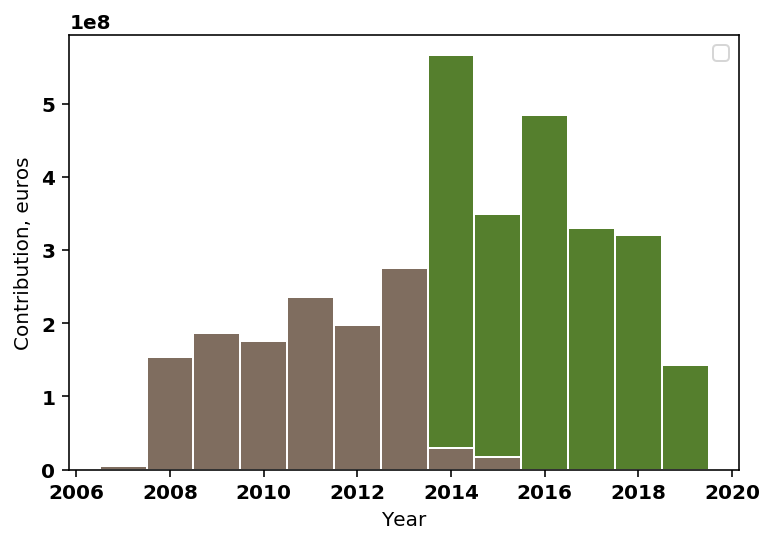

In [26]:
# Plot funding by start year and framework programme

from matplotlib import rc
 
# y-axis in bold
rc('font', weight='bold')

years = list(range(2007, 2020))
print(years)


fp7_money = []
h2020_money = []
for y in years:
    fp7_money.append(funding_fp7[y])
    h2020_money.append(funding_h2020[y])
    
print(fp7_money)
print(h2020_money)

 
# Heights of bars1 + bars2 (TO DO better)
bars = [40, 35, 17, 12, 32]
 
# The position of the bars on the x-axis
r = [0,1,2,3,4]
 
# Names of group and bar width
names = ['A','B','C','D','E']
barWidth = 1
 
# Create brown bars: fp7 money
plt.bar(years, fp7_money, color='#7f6d5f', edgecolor='white', width=barWidth)
# Create green bars: h2020 money, on top of fp7
plt.bar(years, h2020_money, bottom=fp7_money, color='#557f2d', edgecolor='white', width=barWidth)

plt.xlabel("Year")
plt.ylabel("Contribution, euros")
plt.legend("FP7 Programme", "H2020 Programme")
 
# Custom X axis
#plt.xticks(r, names, fontweight='bold')
#plt.xlabel("group")
 
# Show graphic
plt.show()


In [27]:
# Create CSV with costs

contribution = pd.DataFrame(data = None, index = years, columns = ['fp7', 'h2020'])
contribution['fp7'] = fp7_money
contribution['h2020'] = h2020_money

contribution.to_csv("mr2_results/yearly_contributions.csv")
contribution

fp7         h2020
2007  5.345596e+06  0.000000e+00
2008  1.534263e+08  0.000000e+00
2009  1.869858e+08  0.000000e+00
2010  1.765503e+08  0.000000e+00
2011  2.354880e+08  0.000000e+00
2012  1.977490e+08  0.000000e+00
2013  2.754658e+08  0.000000e+00
2014  2.899155e+07  5.375548e+08
2015  1.678502e+07  3.333318e+08
2016  0.000000e+00  4.851729e+08
2017  0.000000e+00  3.301442e+08
2018  0.000000e+00  3.211796e+08
2019  0.000000e+00  1.430101e+08

# financial contributions of projects vs. number of partners

In [28]:
# join participants and coordinators: entities and countries
projects['entities_all'] = projects['coordinator'].fillna('') + ';' + projects['participants'].fillna('')
projects['countries_all'] = projects['coordinatorCountry'].fillna('') + ';' + projects['participantCountries'].fillna('')

In [29]:
# strip off last ; if needed
projects['entities_all'] = projects['entities_all'].apply(lambda x: x.strip(";")) # strips any leading and trailing ;
projects['countries_all'] = projects['countries_all'].apply(lambda x: x.strip(";")) # strips any leading and trailing ;

In [30]:
projects.entities_all.tail()

921    TECHNISCHE UNIVERSITAT HAMBURG;TECHNISCHE UNIV...
922                                          AMPAIRE LTD
923                                  DUFOUR AEROSPACE AG
924                            CLEAR FLIGHT SOLUTIONS BV
925                                         CAARESYS LTD
Name: entities_all, dtype: object

In [31]:
participants = projects.entities_all

def number_of_participants(x):
    if pd.isna(x):
        return 0
    else:
        return len(x.split(";"))

num_participants = list(projects['entities_all'].apply(number_of_participants))
len(num_participants)

926

In [32]:
# number of participating countries

member_countries = projects.participantCountries

num_countries = list(projects['participantCountries'].apply(number_of_participants))
len(num_countries)

926

In [33]:
projects['members_number'] = num_participants
projects['countries_number'] = num_countries

# project duration

In [34]:
start_date = [pd.to_datetime(x) for x in projects.startDate]
end_date = [pd.to_datetime(x) for x in projects.endDate]

duration = [x - y for x,y in zip(end_date, start_date)]

duration_days = [x.days for x in duration]
projects['duration_days'] = duration_days

# add contribution in millions of euros
projects["contribution_mils"] = projects.contribution / 1000000
projects.head(2)

id acronym_x                                         clean_text  \
0  211625     ASSET  asset aeronautic study seamless transport airp...   
1  211723   MEFISTO  methodology framework programme impact assessm...   

      score framework        t0        t1        t2        t3        t4  ...  \
0  0.572112       FP7  0.006421  0.000963  0.221254  0.000673  0.001573  ...   
1  0.124785       FP7  0.102328  0.000448  0.069606  0.023820  0.000734  ...   

   url  workPerformed  contribution  start  \
0  NaN            NaN     2291255.0   2008   
1  NaN            NaN      395939.0   2008   

                                        entities_all         countries_all  \
0  DEUTSCHES ZENTRUM FUER LUFT - UND RAUMFAHRT EV...     DE;FR;EL;DE;UK;SK   
1  L - UP SAS;AEROSPACE AND DEFENCE INDUSTRIES AS...  FR;BE;UK;PL;NL;DE;FR   

  members_number countries_number duration_days contribution_mils  
0             15                5        1277.0          2.291255  
1              8                6         637.0          0.395939  

[2 rows x 53 columns]

In [35]:
print("Average consortium size is: ", np.mean(projects.members_number))
print("Average duration of the project is: ", np.mean(projects.duration_days))

Average consortium size is:  10.084233261339094
Average duration of the project is:  963.1556756756756


### R2 score

In [36]:
# R2 score
from scipy import stats

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


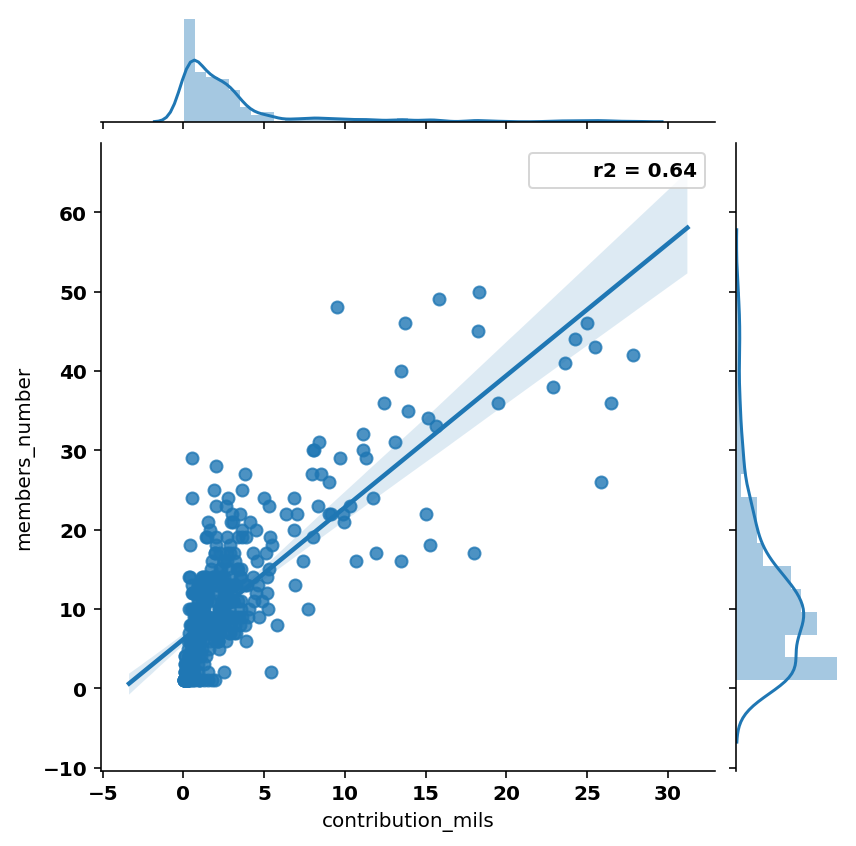

In [37]:
sns.jointplot(projects[projects.frameworkProgramme == 'FP7']['contribution_mils'], \
              projects[projects.frameworkProgramme == 'FP7']['members_number'], kind="reg", stat_func=r2)

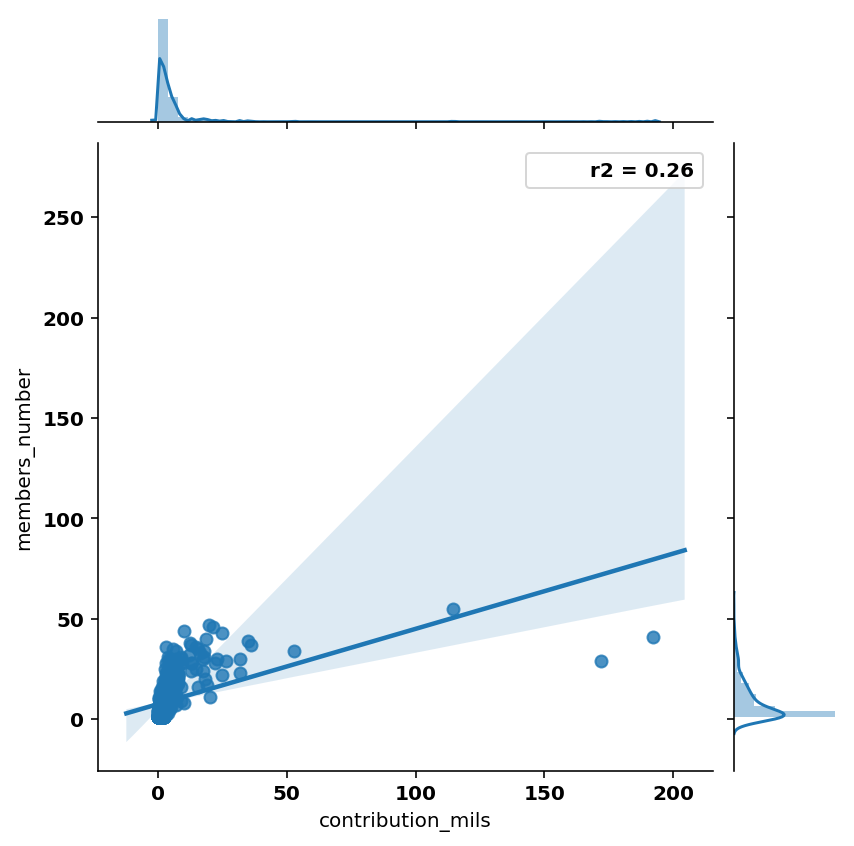

In [38]:
sns.jointplot(projects[projects.frameworkProgramme == 'H2020']['contribution_mils'], \
              projects[projects.frameworkProgramme == 'H2020']['members_number'], kind="reg", stat_func=r2)

In [39]:
# R2 scores calculated above
r2_fp7 = 0.64
r2_h2020 = 0.26

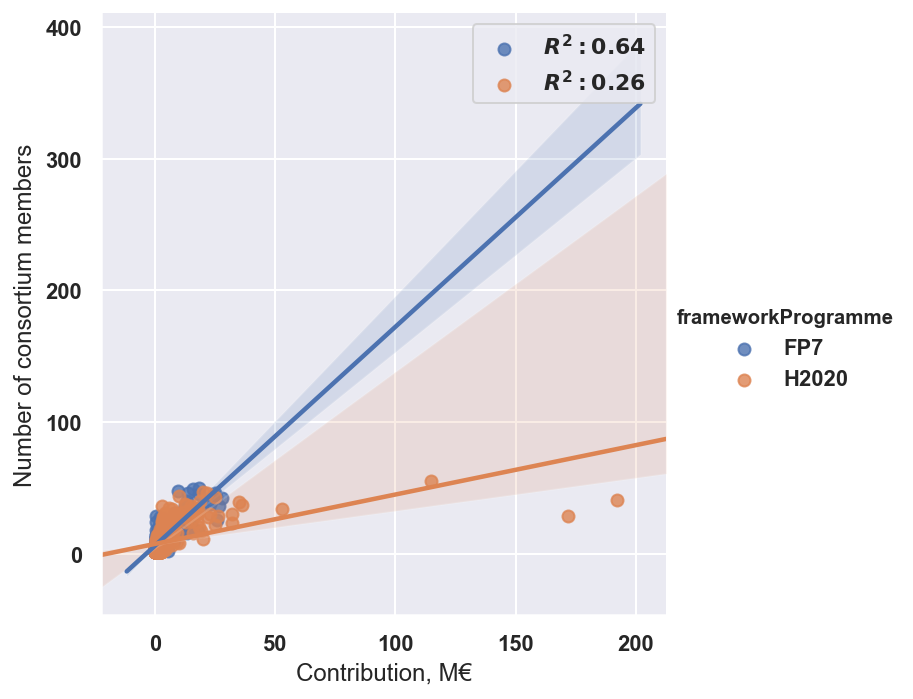

In [40]:
sns.set(color_codes = True)
#scatterplot with regression fit
ax = sns.lmplot(x = "contribution_mils", y = "members_number", data = projects[projects.frameworkProgramme != 'FP7-PEOPLE'], hue = 'frameworkProgramme', legend = True, fit_reg=True)

ax.set(xlabel='Contribution, M€', ylabel='Number of consortium members')


axs = ax.axes[0, 0]
axs.legend()
leg = axs.get_legend()
L_labels = leg.get_texts()

label_line_1 = r'$R^2:{0:.2f}$'.format(r2_fp7)
label_line_2 = r'$R^2:{0:.2f}$'.format(r2_h2020) # R2 scores calculated above
L_labels[0].set_text(label_line_1)
L_labels[1].set_text(label_line_2)

In [41]:
ax.savefig("mr2_results/contribution_vs_num_members.svg")
ax.savefig("mr2_results/contribution_vs_num_members.png")

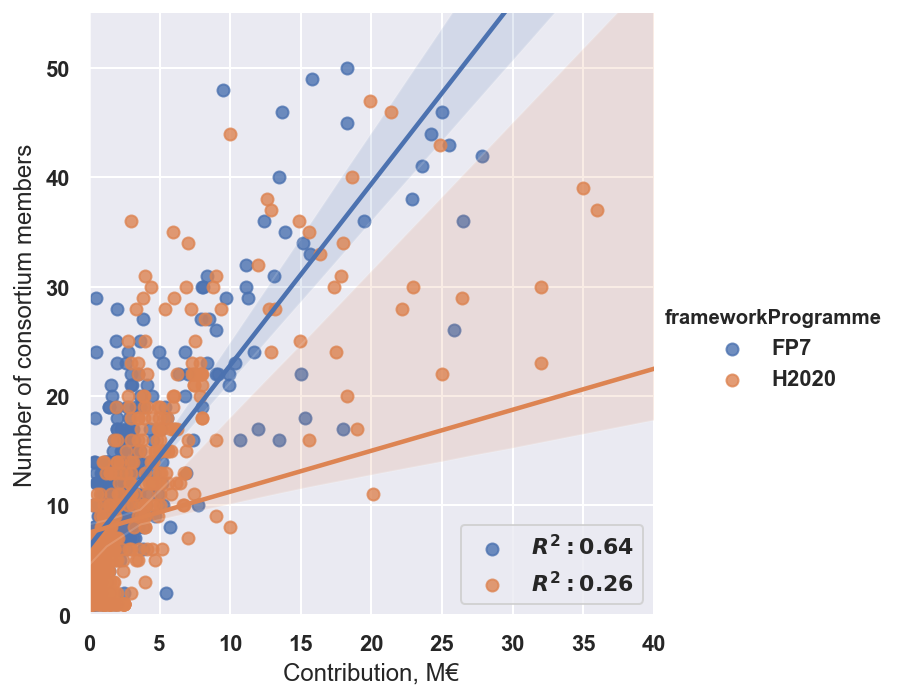

In [42]:
ax = sns.lmplot(x = "contribution_mils", y = "members_number", \
                data = projects[projects.frameworkProgramme != 'FP7-PEOPLE'], \
                hue = 'frameworkProgramme', legend = True, fit_reg=True, logx=False)
ax.set(xlabel='Contribution, M€', ylabel='Number of consortium members')

# limit the values
ax.set(xlim=(0, 40))
ax.set(ylim=(0, 55))

axs = ax.axes[0, 0]
axs.legend()
leg = axs.get_legend()
L_labels = leg.get_texts()

label_line_1 = r'$R^2:{0:.2f}$'.format(r2_fp7)
label_line_2 = r'$R^2:{0:.2f}$'.format(r2_h2020) # R2 scores calculated above
L_labels[0].set_text(label_line_1)
L_labels[1].set_text(label_line_2)

In [387]:
ax.savefig("mr2_results/contribution_vs_num_members_focused.svg")
ax.savefig("mr2_results/contribution_vs_num_members_focused.png")

### WITH 4 OUTLIERS FROM H2020 removed

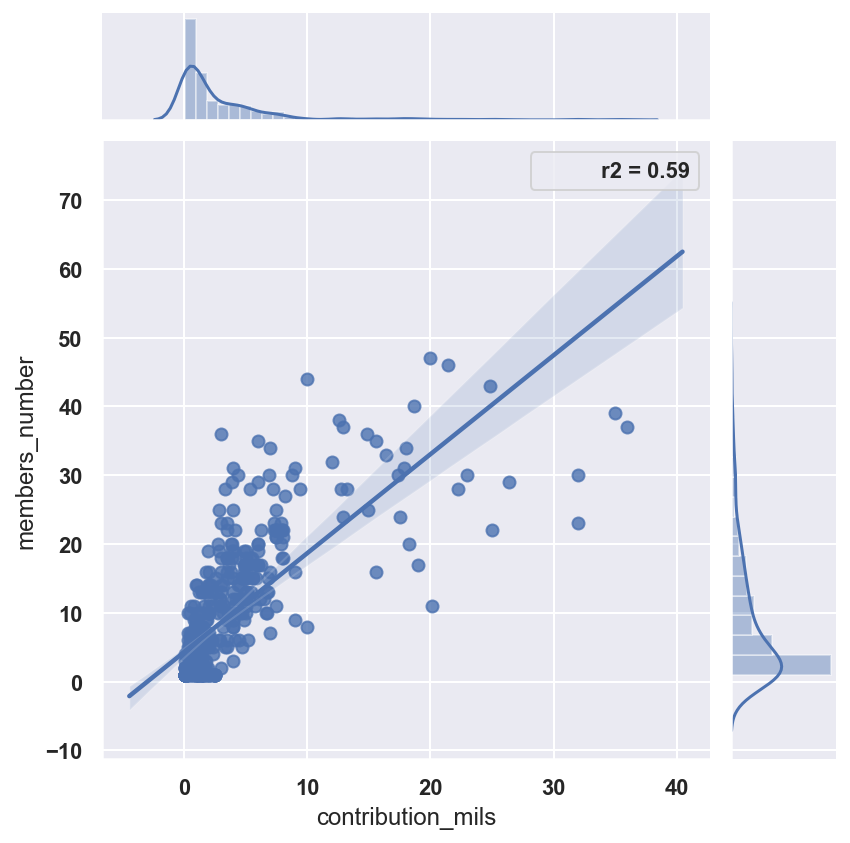

In [43]:
# WITH 4 OUTLIERS FROM H2020 removed
sns.jointplot(projects[(projects.frameworkProgramme == 'H2020') & (projects.contribution_mils <=50)]['contribution_mils'], \
              projects[(projects.frameworkProgramme == 'H2020') & (projects.contribution_mils <=50)]['members_number'], kind="reg", stat_func=r2)

In [44]:
r2_fp7 = 0.64
r2_h2020 = 0.59 # with outliers removed

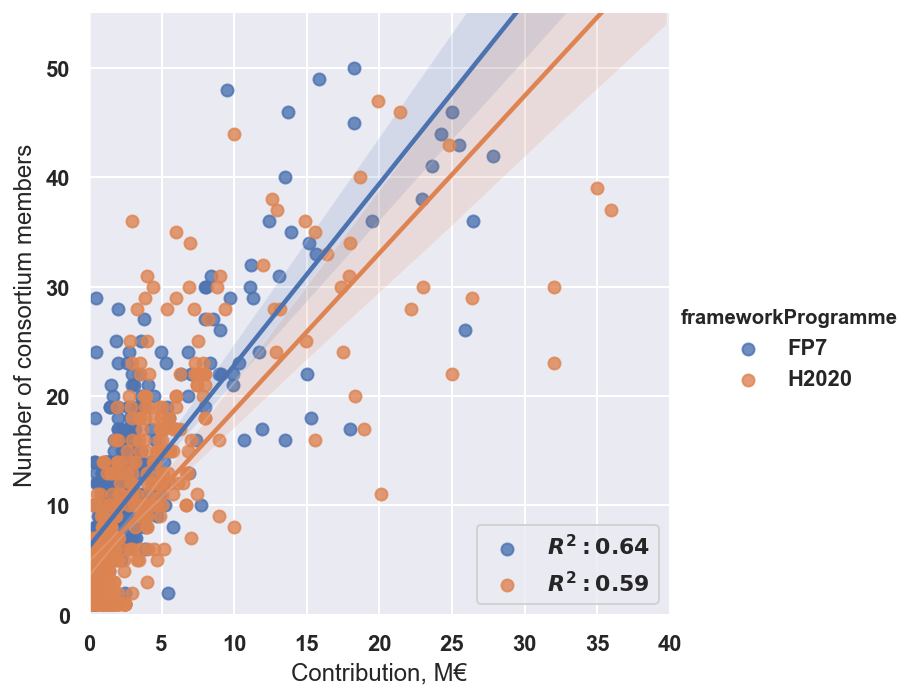

In [45]:
ax = sns.lmplot(x = "contribution_mils", y = "members_number", \
                data = projects[projects.contribution_mils <= 50], \
                hue = 'frameworkProgramme', legend = True, fit_reg=True, logx=False)
ax.set(xlabel='Contribution, M€', ylabel='Number of consortium members')

# limit the values
ax.set(xlim=(0, 40))
ax.set(ylim=(0, 55))

axs = ax.axes[0, 0]
axs.legend()
leg = axs.get_legend()
L_labels = leg.get_texts()

label_line_1 = r'$R^2:{0:.2f}$'.format(r2_fp7)
label_line_2 = r'$R^2:{0:.2f}$'.format(r2_h2020) # R2 scores calculated above
L_labels[0].set_text(label_line_1)
L_labels[1].set_text(label_line_2)

In [391]:
ax.savefig("mr2_results/contribution_vs_num_members_outliers_h2020_removed.svg")
ax.savefig("mr2_results/contribution_vs_num_members_outliers_h2020_removed.png")

/anaconda3/lib/python3.6/site-packages/seaborn/regression.py:279: RuntimeWarning: invalid value encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]


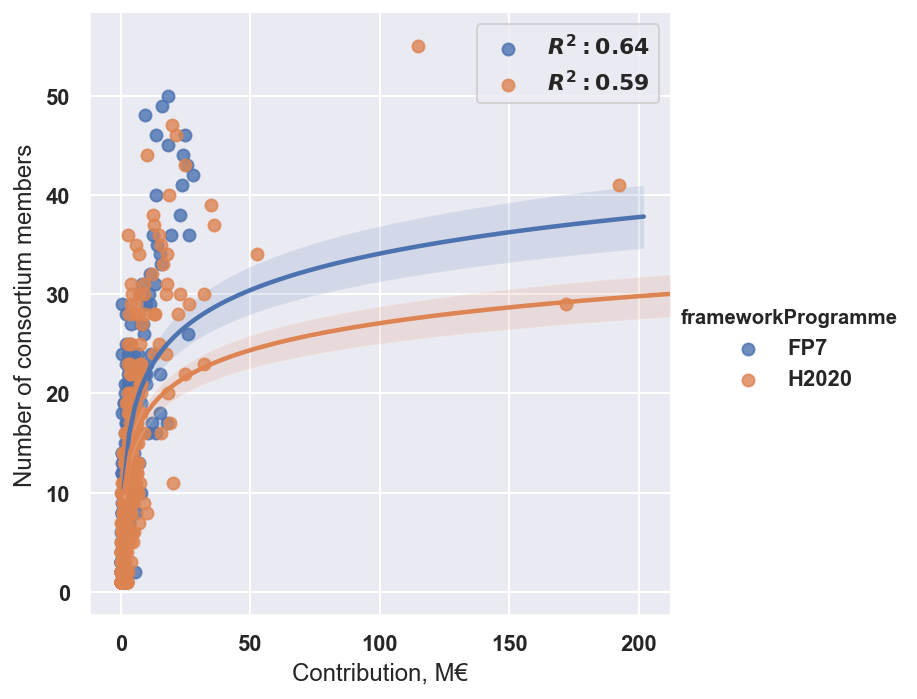

In [46]:
# LOGARITHMIC: regression is calculated as y ~log(x)
ax = sns.lmplot(x = "contribution_mils", y = "members_number", \
                data = projects[projects.frameworkProgramme != 'FP7-PEOPLE'], \
                hue = 'frameworkProgramme', legend = True, fit_reg=True, logx=True)
ax.set(xlabel='Contribution, M€', ylabel='Number of consortium members')

# limit the values
#ax.set(xlim=(0, 40))
#ax.set(ylim=(0, 55))

axs = ax.axes[0, 0]
axs.legend()
leg = axs.get_legend()
L_labels = leg.get_texts()

label_line_1 = r'$R^2:{0:.2f}$'.format(r2_fp7)
label_line_2 = r'$R^2:{0:.2f}$'.format(r2_h2020) # R2 scores calculated above
L_labels[0].set_text(label_line_1)
L_labels[1].set_text(label_line_2)

In [393]:
ax.savefig("mr2_results/contribution_vs_num_members_log.svg")
ax.savefig("mr2_results/contribution_vs_num_members_log.png")

In [47]:
# add duration by years into project

projects['duration_years'] = projects['duration_days'] / 365

### divide the projects into "expensive" and "cheap"

- df_expensive - projects with financing over 10 million €
- df_cheap - projects with financing of up to 10 million €

In [48]:
df_expensive = projects[projects.contribution_mils > 10]
df_cheap = projects[projects.contribution_mils <= 10]

n_cheap = df_cheap.shape[0]
n_expensive = df_expensive.shape[0]

print("There are ", n_cheap, " cheap projects, and ", n_expensive, \
      " expensive projects, which in total gives ", n_cheap + n_expensive, " projects.")

There are  861  cheap projects, and  65  expensive projects, which in total gives  926  projects.


### correlation financing, number of entities for cheap and expensive projects

### CHEAP

Text(25.125, 0.5, 'Number of consortium members')

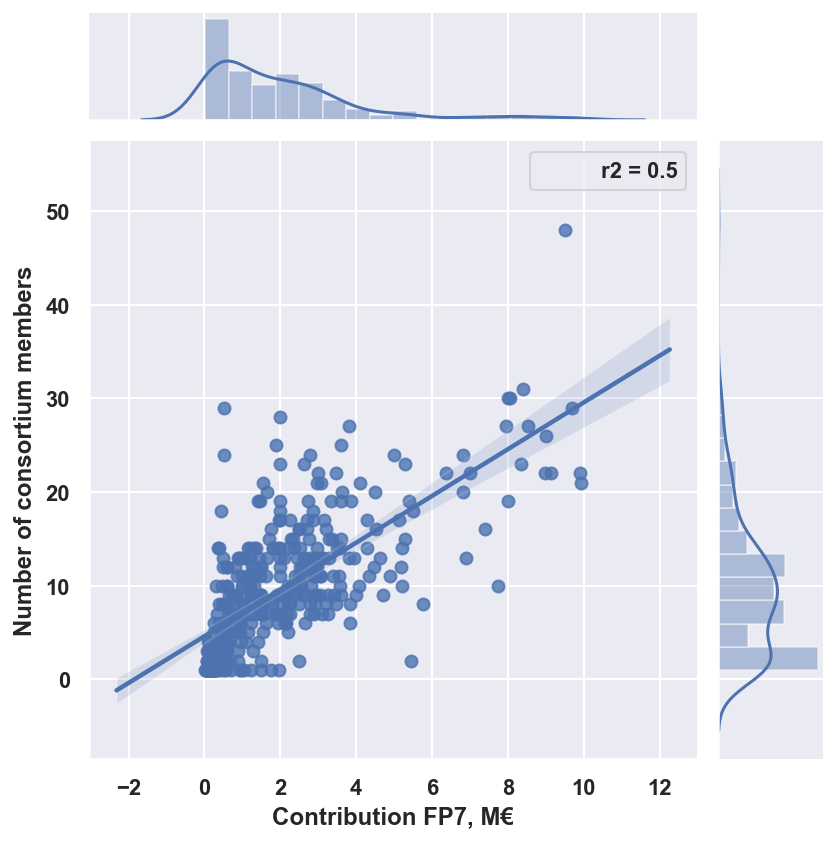

In [49]:
ax = sns.jointplot(df_cheap[df_cheap.frameworkProgramme == 'FP7']['contribution_mils'], \
              df_cheap[df_cheap.frameworkProgramme == 'FP7']['members_number'], kind="reg", stat_func=r2)
ax.ax_joint.set_xlabel('Contribution FP7, M€', fontweight='bold')
ax.ax_joint.set_ylabel('Number of consortium members', fontweight='bold')

In [397]:
ax.savefig("mr2_results/contribution_vs_num_members_cheap_fp7.svg")
ax.savefig("mr2_results/contribution_vs_num_members_cheap_fp7.png")

Text(25.125, 0.5, 'Number of consortium members')

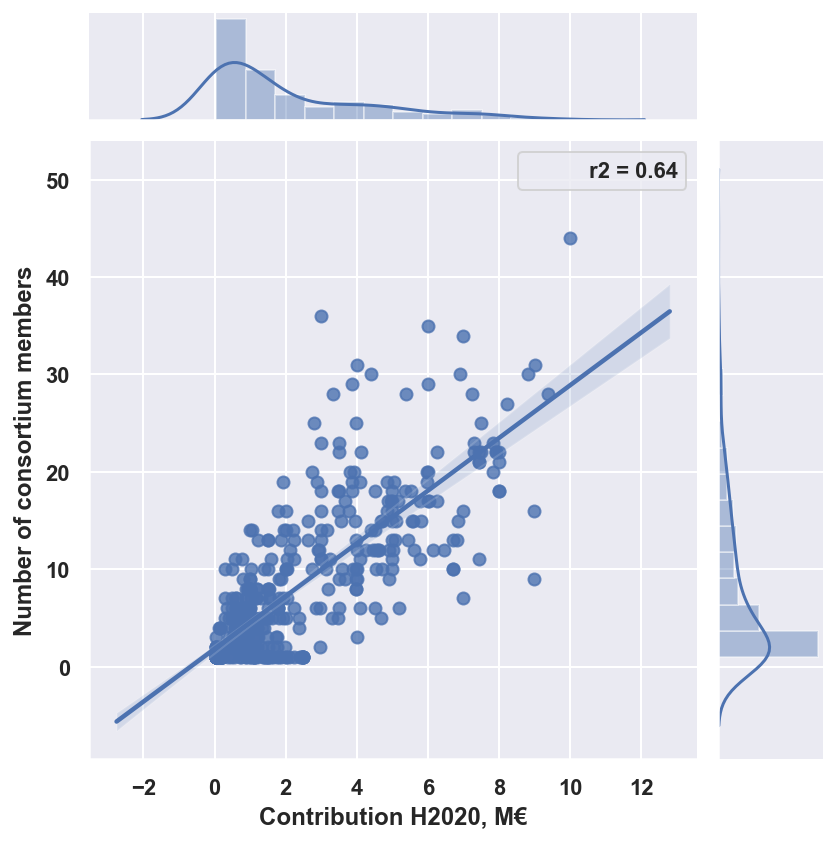

In [50]:
ax = sns.jointplot(df_cheap[df_cheap.frameworkProgramme == 'H2020']['contribution_mils'], \
              df_cheap[df_cheap.frameworkProgramme == 'H2020']['members_number'], kind="reg", stat_func=r2)
ax.ax_joint.set_xlabel('Contribution H2020, M€', fontweight='bold')
ax.ax_joint.set_ylabel('Number of consortium members', fontweight='bold')

In [51]:
ax.savefig("mr2_results/contribution_vs_num_members_cheap_h2020.svg")
ax.savefig("mr2_results/contribution_vs_num_members_cheap_h2020.png")

In [51]:
r2_fp7 = 0.5
r2_h2020 = 0.64

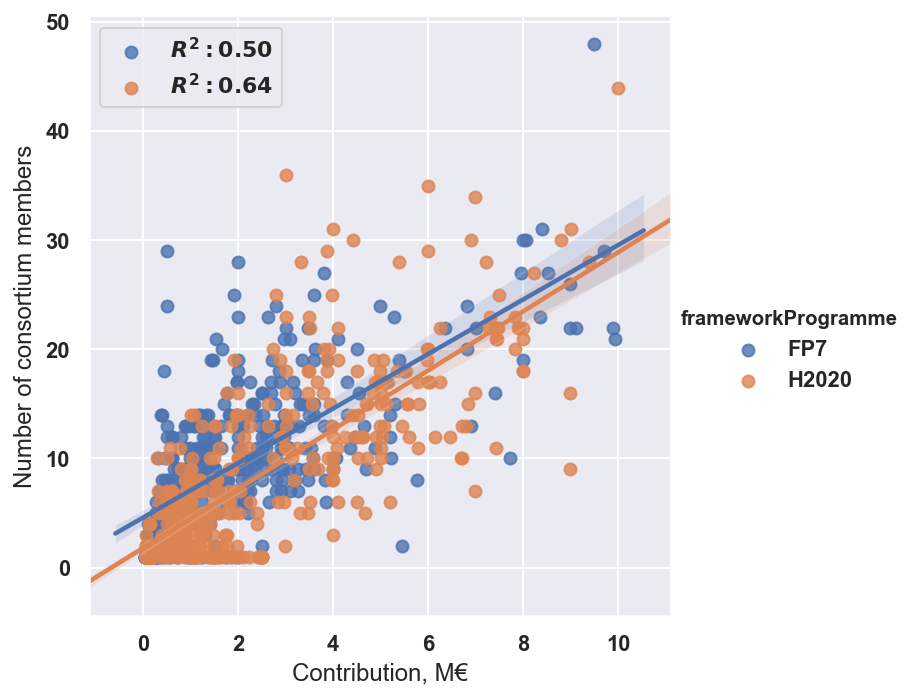

In [52]:
# cheap
ax = sns.lmplot(x = "contribution_mils", y = "members_number", \
                data = df_cheap, \
                hue = 'frameworkProgramme', legend = True, fit_reg=True, logx=False)
ax.set(xlabel='Contribution, M€', ylabel='Number of consortium members')

# limit the values
#ax.set(xlim=(0, 40))
#ax.set(ylim=(0, 55))

# if R2 score is wanted
axs = ax.axes[0, 0]
axs.legend()
leg = axs.get_legend()
L_labels = leg.get_texts()

label_line_1 = r'$R^2:{0:.2f}$'.format(r2_fp7)
label_line_2 = r'$R^2:{0:.2f}$'.format(r2_h2020) # R2 scores calculated above
L_labels[0].set_text(label_line_1)
L_labels[1].set_text(label_line_2)


In [402]:
ax.savefig("mr2_results/contribution_vs_num_members_cheap.svg")
ax.savefig("mr2_results/contribution_vs_num_members_cheap.png")

#### EXPENSIVE

Text(25.125, 0.5, 'Number of consortium members')

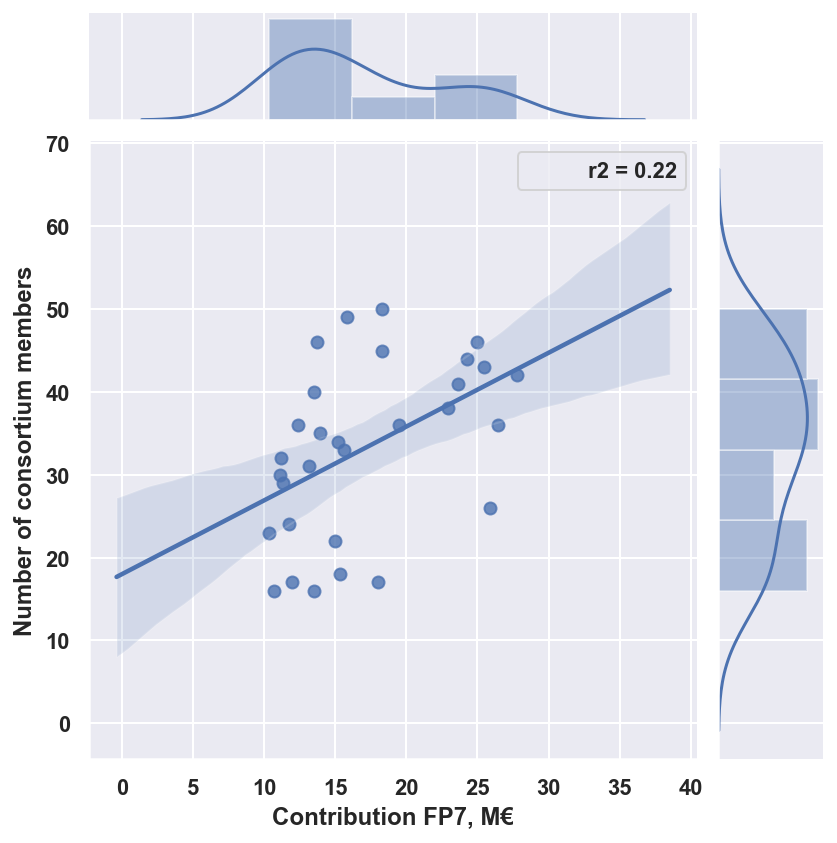

In [53]:
ax = sns.jointplot(df_expensive[df_expensive.frameworkProgramme == 'FP7']['contribution_mils'], \
              df_expensive[df_expensive.frameworkProgramme == 'FP7']['members_number'], kind="reg", stat_func=r2)
ax.ax_joint.set_xlabel('Contribution FP7, M€', fontweight='bold')
ax.ax_joint.set_ylabel('Number of consortium members', fontweight='bold')

In [289]:
ax.savefig("mr2_results/contribution_vs_num_members_expensive_fp7.svg")
ax.savefig("mr2_results/contribution_vs_num_members_expensive_fp7.png")

Text(25.125, 0.5, 'Number of consortium members')

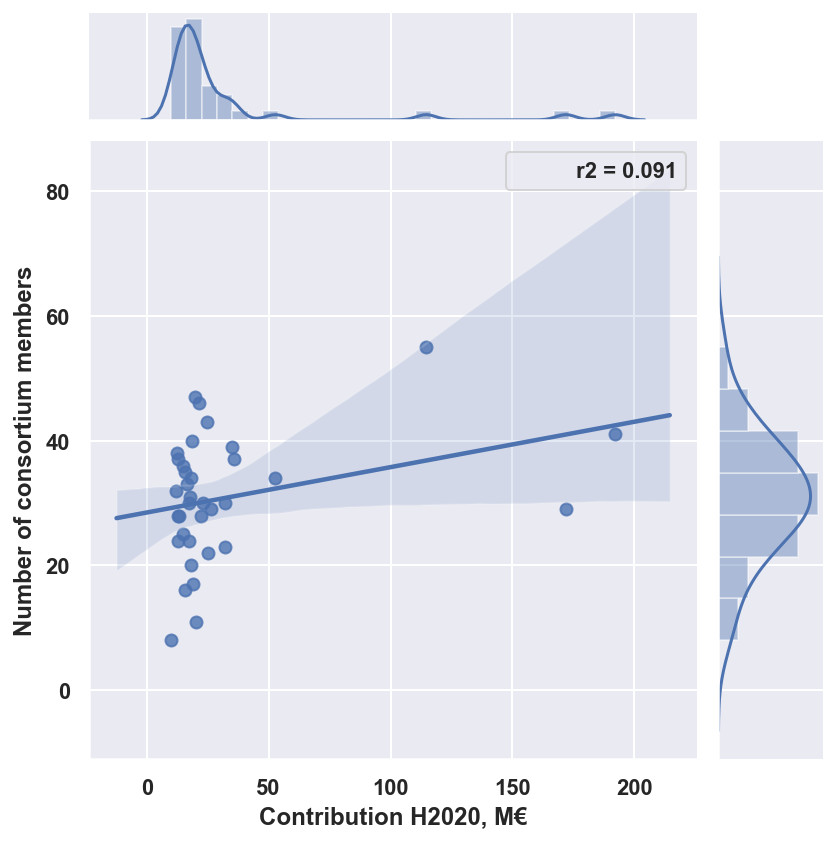

In [55]:
ax = sns.jointplot(df_expensive[df_expensive.frameworkProgramme == 'H2020']['contribution_mils'], \
              df_expensive[df_expensive.frameworkProgramme == 'H2020']['members_number'], kind="reg", stat_func=r2)
ax.ax_joint.set_xlabel('Contribution H2020, M€', fontweight='bold')
ax.ax_joint.set_ylabel('Number of consortium members', fontweight='bold')

In [ ]:
ax.savefig("mr2_results/contribution_vs_num_members_expensive_h2020.svg")
ax.savefig("mr2_results/contribution_vs_num_members_expensive_h2020.png")

### H2020 expensive - with 4 outliers removed

Text(25.125, 0.5, 'Number of consortium members')

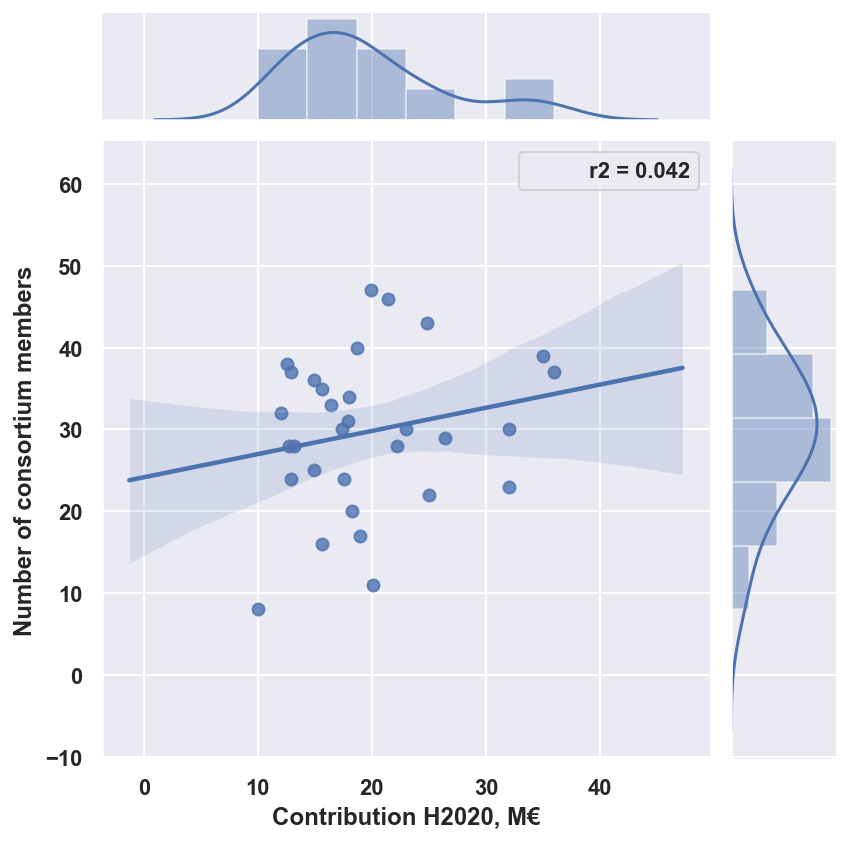

In [56]:
ax = sns.jointplot(df_expensive[(df_expensive.frameworkProgramme == 'H2020') & (df_expensive.contribution_mils <= 50)]['contribution_mils'], \
              df_expensive[(df_expensive.frameworkProgramme == 'H2020') & (df_expensive.contribution_mils <= 50)]['members_number'], kind="reg", stat_func=r2)
ax.ax_joint.set_xlabel('Contribution H2020, M€', fontweight='bold')
ax.ax_joint.set_ylabel('Number of consortium members', fontweight='bold')

In [57]:
ax.savefig("mr2_results/contribution_vs_num_members_expensive_h2020_outliers_removed.svg")
ax.savefig("mr2_results/contribution_vs_num_members_expensive_h2020_outliers_removed.png")

In [54]:
r2_fp7 = 0.22
r2_h2020 = 0.091

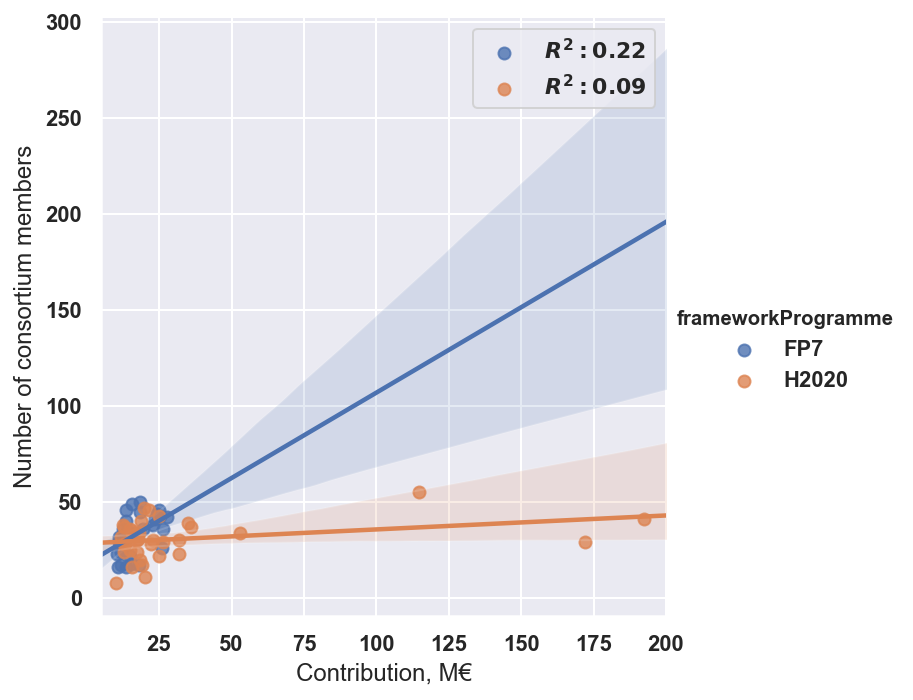

In [55]:
# cheap
ax = sns.lmplot(x = "contribution_mils", y = "members_number", \
                data = df_expensive, \
                hue = 'frameworkProgramme', legend = True, fit_reg=True, logx=False)
ax.set(xlabel='Contribution, M€', ylabel='Number of consortium members')

# limit the values
ax.set(xlim=(5, 200))
#ax.set(ylim=(0, 55))

# if R2 score is wanted
axs = ax.axes[0, 0]
axs.legend()
leg = axs.get_legend()
L_labels = leg.get_texts()

label_line_1 = r'$R^2:{0:.2f}$'.format(r2_fp7)
label_line_2 = r'$R^2:{0:.2f}$'.format(r2_h2020) # R2 scores calculated above
L_labels[0].set_text(label_line_1)
L_labels[1].set_text(label_line_2)


In [294]:
ax.savefig("mr2_results/contribution_vs_num_members_expensive.svg")
ax.savefig("mr2_results/contribution_vs_num_members_expensive.png")

### Which are these projects in H2020 that have financing over 50 million euros?

In [56]:
projects[projects.contribution_mils >= 50]

id     acronym_x                                         clean_text  \
266  807089  REG GAM 2018  regional aircraft aircraft transport approxima...   
891  807081  SYS GAM 2018  systems itd systems itd develop build highly i...   
892  807085  ENG GAM 2018  engine itd gam engines itd work towards radica...   
894  807097  LPA GAM 2018  large passenger aircraft challenge clean sky l...   

        score framework        t0        t1        t2        t3        t4  \
266  0.843816     H2020  0.501002  0.131687  0.151320  0.002610  0.006143   
891  0.807297     H2020  0.363227  0.000325  0.308368  0.000227  0.000542   
892  0.832397     H2020  0.481579  0.000269  0.215675  0.000188  0.058663   
894  0.716564     H2020  0.365831  0.000261  0.318253  0.000182  0.000450   

     ...                                      workPerformed  contribution  \
266  ...                                                NaN  5.277773e+07   
891  ...  In 2018, several cockpit technologies reached ...  1.145963e+08   
892  ...  Work Package 0 - Engine ITD Management\nAs alw...  1.719201e+08   
894  ...  "Major achievement accomplished in LPA in 2018...  1.921663e+08   

     start                                       entities_all  \
266   2014  LEONARDO - SOCIETA PER  AZIONI;HELLENIC AEROSP...   
891   2014  THALES AVS FRANCE SAS;AIRBUS;COMPOSE SAS;PALL ...   
892   2014  MTU AERO ENGINES AG;AIRBUS;PRICE INDUCTION SA;...   
894   2014  AIRBUS;PRICE INDUCTION SA;COVENTRY UNIVERSITY;...   

                           countries_all members_number countries_number  \
266        IT;EL;PT;NL;IT;DE;FR;ES;BE;UK             34                9   
891  FR;FR;UK;DE;SE;NL;CZ;PL;AT;IT;ES;IE             55               11   
892        DE;FR;NL;DE;CZ;IT;ES;UK;SE;TR             29                9   
894     FR;FR;UK;PT;SE;ES;NL;CZ;DE;BE;IT             41               10   

    duration_days contribution_mils duration_years  
266        2185.0         52.777725       5.986301  
891        2190.0        114.596335       6.000000  
892        2188.0        171.920071       5.994521  
894        2182.0        192.166282       5.978082  

[4 rows x 54 columns]

In [57]:
projects[projects.contribution_mils >= 50].title

266           Regional Aircraft
891                 Systems ITD
892       Engine ITD - GAM 2018
894    Large Passenger Aircraft
Name: title, dtype: object

In [58]:
projects[projects.contribution_mils >= 50].coordinator

266    LEONARDO - SOCIETA PER  AZIONI
891             THALES AVS FRANCE SAS
892               MTU AERO ENGINES AG
894                            AIRBUS
Name: coordinator, dtype: object

In [59]:
projects[projects.contribution_mils >= 50].topics  #It's from CLEAN SKY

266    CS2-GAM-2018-REG
891    CS2-GAM-2018-SYS
892    CS2-GAM-2018-ENG
894    CS2-GAM-2018-LPA
Name: topics, dtype: object

### R2 scores for duration

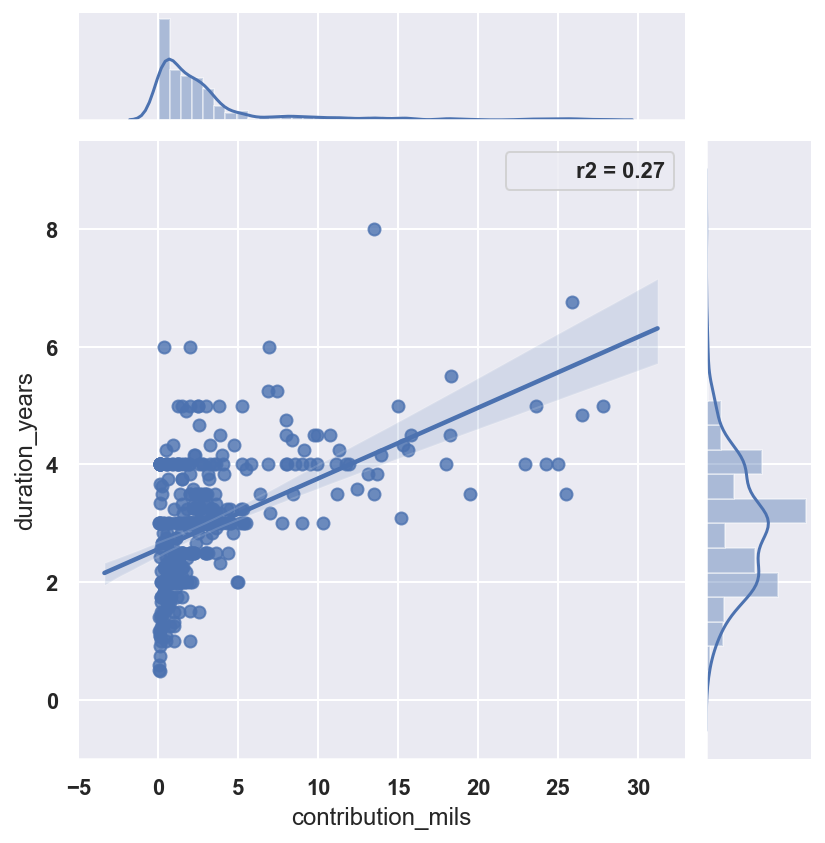

In [60]:
sns.jointplot(projects[projects.frameworkProgramme == 'FP7']['contribution_mils'], \
              projects[projects.frameworkProgramme == 'FP7']['duration_years'], kind="reg", stat_func=r2)

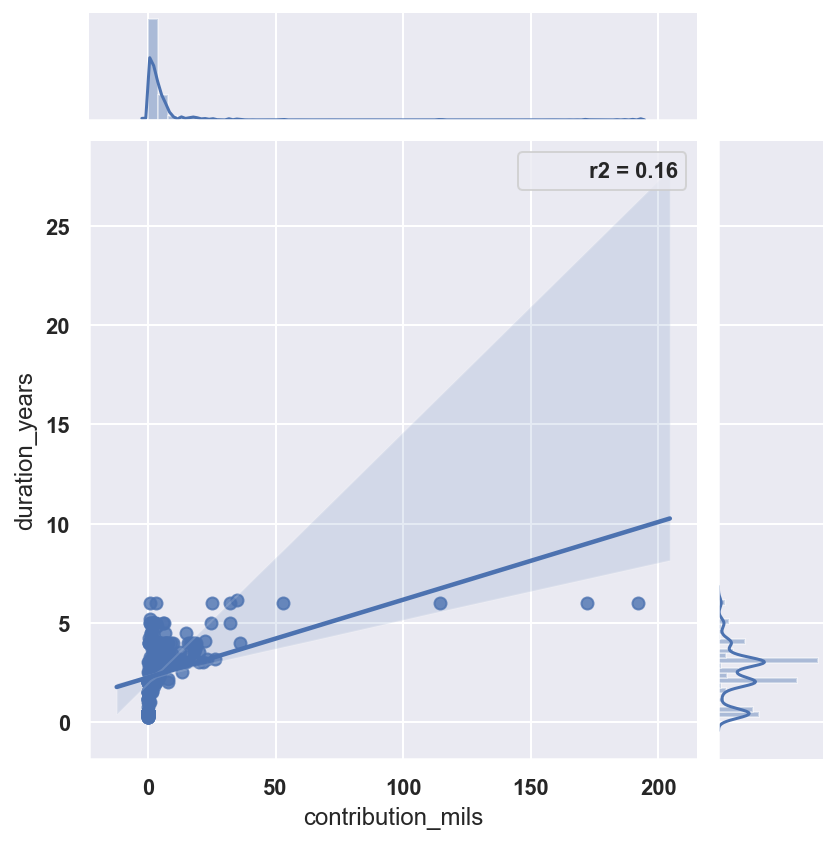

In [61]:
sns.jointplot(projects[projects.frameworkProgramme == 'H2020']['contribution_mils'], \
              projects[projects.frameworkProgramme == 'H2020']['duration_years'], kind="reg", stat_func=r2)

In [62]:
# R2 scores calculated above
r2_fp7 = 0.27
r2_h2020 = 0.16

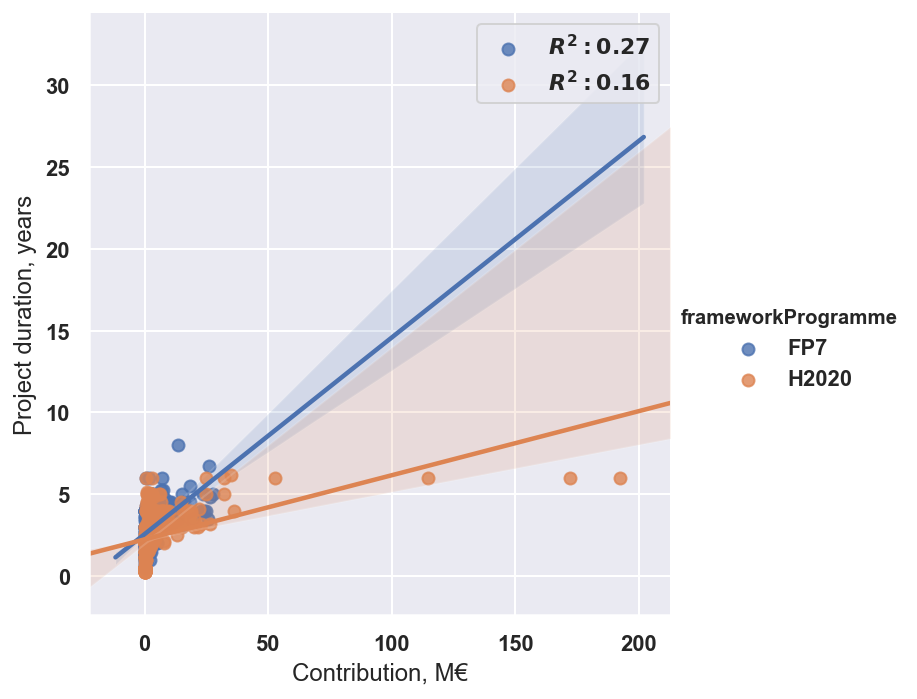

In [63]:
ax = sns.lmplot(x = "contribution_mils", y = "duration_years", \
                data = projects, hue = 'frameworkProgramme', legend = True, fit_reg = True, logx=False)
ax.set(xlabel='Contribution, M€', ylabel='Project duration, years')

axs = ax.axes[0, 0]
axs.legend()
leg = axs.get_legend()
L_labels = leg.get_texts()

label_line_1 = r'$R^2:{0:.2f}$'.format(r2_fp7)
label_line_2 = r'$R^2:{0:.2f}$'.format(r2_h2020) # R2 scores calculated above
L_labels[0].set_text(label_line_1)
L_labels[1].set_text(label_line_2)

In [302]:
ax.savefig("mr2_results/contribution_vs_duration.svg")
ax.savefig("mr2_results/contribution_vs_duration.png")

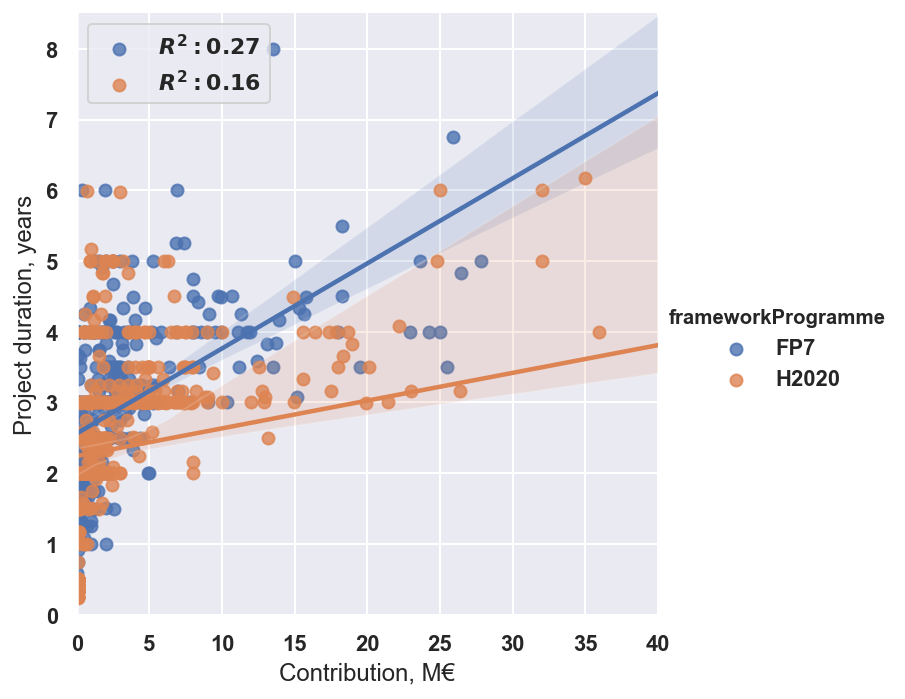

In [64]:
ax = sns.lmplot(x = "contribution_mils", y = "duration_years", \
                data = projects, hue = 'frameworkProgramme', legend = True, fit_reg = True, logx=False)
ax.set(xlabel='Contribution, M€', ylabel='Project duration, years')

# limit the values
ax.set(xlim=(0, 40))
ax.set(ylim=(0, 8.5))

axs = ax.axes[0, 0]
axs.legend()
leg = axs.get_legend()
L_labels = leg.get_texts()

label_line_1 = r'$R^2:{0:.2f}$'.format(r2_fp7)
label_line_2 = r'$R^2:{0:.2f}$'.format(r2_h2020) # R2 scores calculated above
L_labels[0].set_text(label_line_1)
L_labels[1].set_text(label_line_2)

In [304]:
ax.savefig("mr2_results/contribution_vs_duration_focused.svg")
ax.savefig("mr2_results/contribution_vs_duration_focused.png")

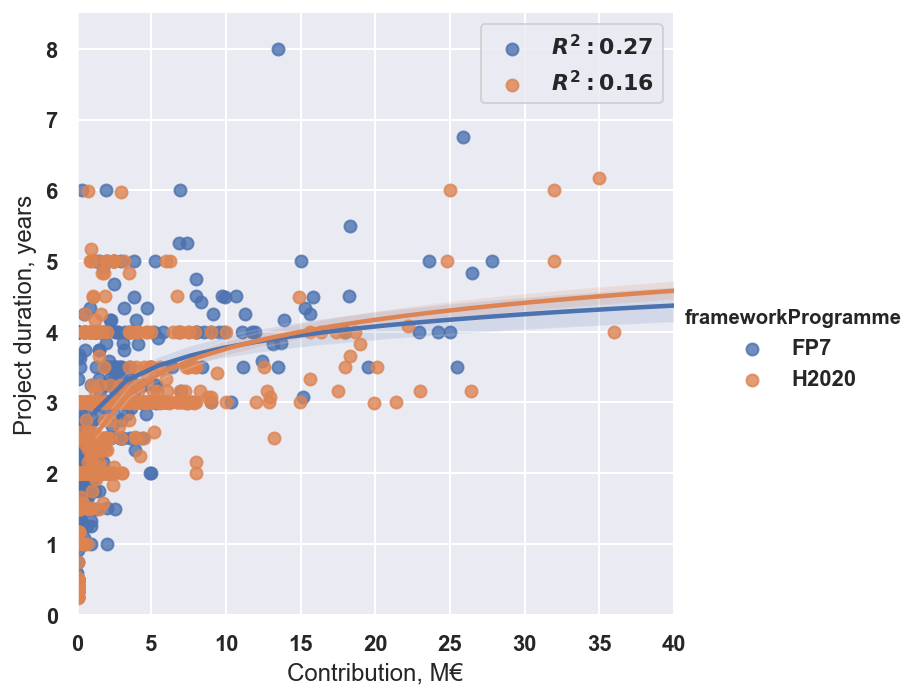

In [65]:
# LOGARITHMIC

ax = sns.lmplot(x = "contribution_mils", y = "duration_years", \
                data = projects, hue = 'frameworkProgramme', legend = True, fit_reg = True, logx=True)
ax.set(xlabel='Contribution, M€', ylabel='Project duration, years')

# limit the values
ax.set(xlim=(0, 40))
ax.set(ylim=(0, 8.5))

axs = ax.axes[0, 0]
axs.legend()
leg = axs.get_legend()
L_labels = leg.get_texts()

label_line_1 = r'$R^2:{0:.2f}$'.format(r2_fp7)
label_line_2 = r'$R^2:{0:.2f}$'.format(r2_h2020) # R2 scores calculated above
L_labels[0].set_text(label_line_1)
L_labels[1].set_text(label_line_2)

In [306]:
ax.savefig("mr2_results/contribution_vs_duration_log.svg")
ax.savefig("mr2_results/contribution_vs_duration_log.png")

### correlation financing, project duration for cheap and expensive projects

### CHEAP

Text(25.125, 0.5, 'Project duration, years')

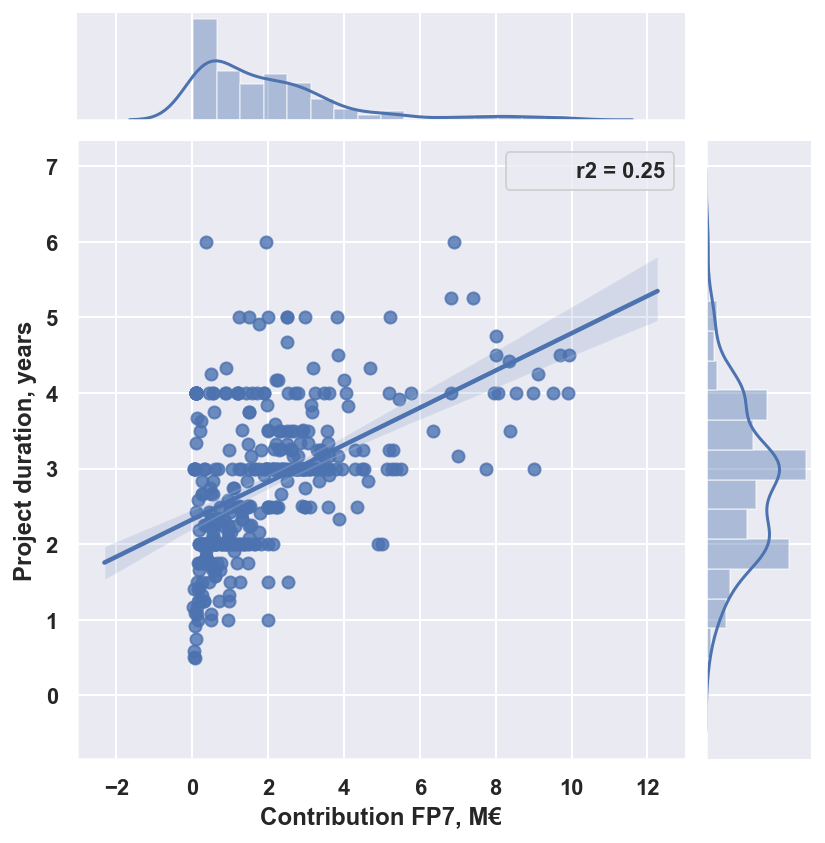

In [70]:
ax = sns.jointplot(df_cheap[df_cheap.frameworkProgramme == 'FP7']['contribution_mils'], \
              df_cheap[df_cheap.frameworkProgramme == 'FP7']['duration_years'], kind="reg", stat_func=r2)
ax.ax_joint.set_xlabel('Contribution FP7, M€', fontweight='bold')
ax.ax_joint.set_ylabel('Project duration, years', fontweight='bold')

In [308]:
ax.savefig("mr2_results/contribution_vs_duration_cheap_fp7.svg")
ax.savefig("mr2_results/contribution_vs_duration_cheap_fp7.png")

Text(37.400000000000006, 0.5, 'Project duration, years')

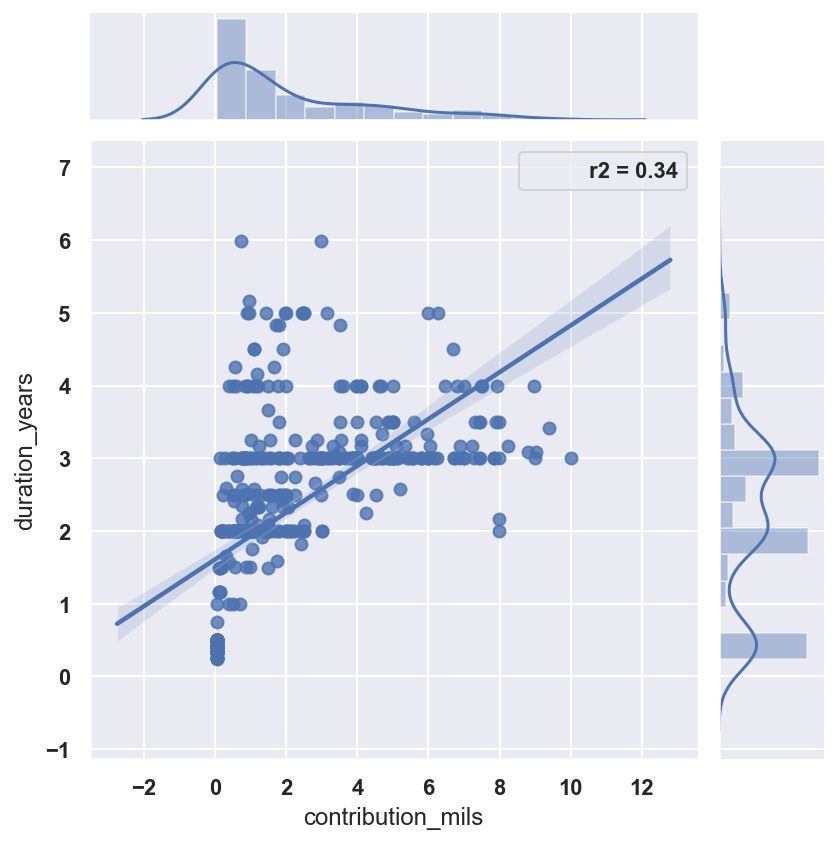

In [71]:
sns.jointplot(df_cheap[df_cheap.frameworkProgramme == 'H2020']['contribution_mils'], \
              df_cheap[df_cheap.frameworkProgramme == 'H2020']['duration_years'], kind="reg", stat_func=r2)
ax.ax_joint.set_xlabel('Contribution H2020, M€', fontweight='bold')
ax.ax_joint.set_ylabel('Project duration, years', fontweight='bold')

In [310]:
ax.savefig("mr2_results/contribution_vs_duration_cheap_h2020.svg")
ax.savefig("mr2_results/contribution_vs_duration_cheap_h2020.png")

In [72]:
r2_fp7 = 0.25
r2_h2020 = 0.34

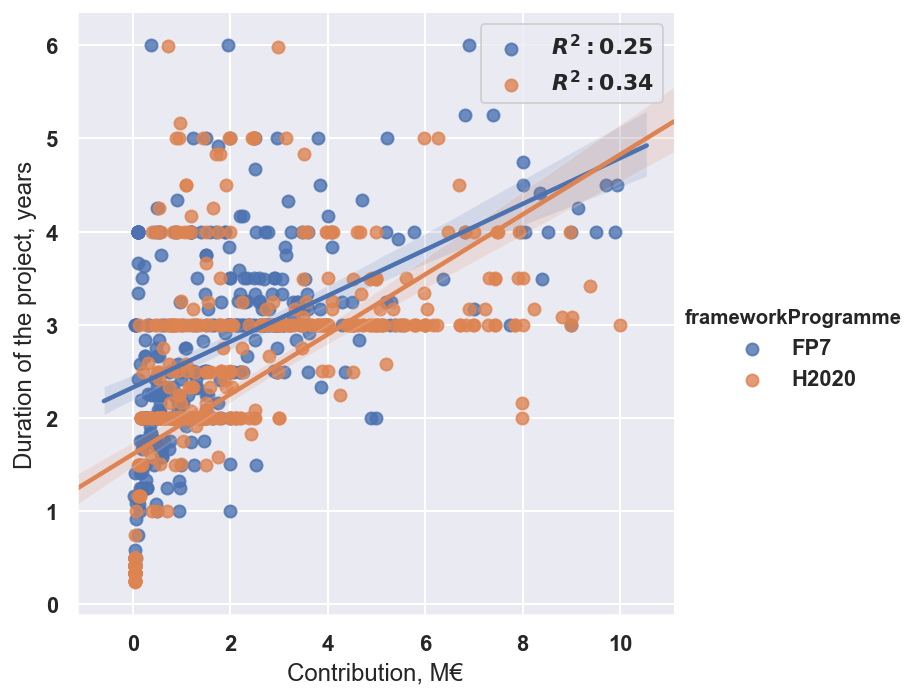

In [73]:
# cheap
ax = sns.lmplot(x = "contribution_mils", y = "duration_years", \
                data = df_cheap, \
                hue = 'frameworkProgramme', legend = True, fit_reg=True, logx=False)
ax.set(xlabel='Contribution, M€', ylabel='Duration of the project, years')

# limit the values
#ax.set(xlim=(0, 40))
#ax.set(ylim=(0, 55))

# if R2 score is wanted
axs = ax.axes[0, 0]
axs.legend()
leg = axs.get_legend()
L_labels = leg.get_texts()

label_line_1 = r'$R^2:{0:.2f}$'.format(r2_fp7)
label_line_2 = r'$R^2:{0:.2f}$'.format(r2_h2020) # R2 scores calculated above
L_labels[0].set_text(label_line_1)
L_labels[1].set_text(label_line_2)


In [313]:
ax.savefig("mr2_results/contribution_vs_duration_years_cheap.svg")
ax.savefig("mr2_results/contribution_vs_duration_years_cheap.png")

#### EXPENSIVE

Text(25.125, 0.5, 'Project duration, years')

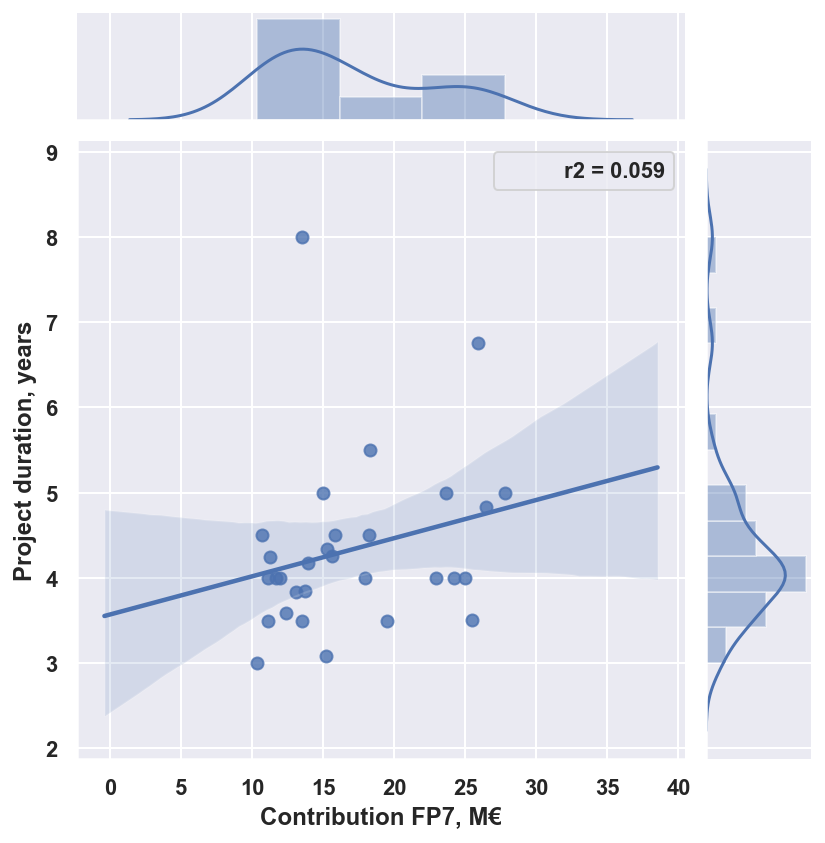

In [74]:
ax = sns.jointplot(df_expensive[df_expensive.frameworkProgramme == 'FP7']['contribution_mils'], \
              df_expensive[df_expensive.frameworkProgramme == 'FP7']['duration_years'], kind="reg", stat_func=r2)
ax.ax_joint.set_xlabel('Contribution FP7, M€', fontweight='bold')
ax.ax_joint.set_ylabel('Project duration, years', fontweight='bold')

In [315]:
ax.savefig("mr2_results/contribution_vs_duration_expensive_fp7.svg")
ax.savefig("mr2_results/contribution_vs_duration_expensive_fp7.png")

Text(25.125, 0.5, 'Project duration, years')

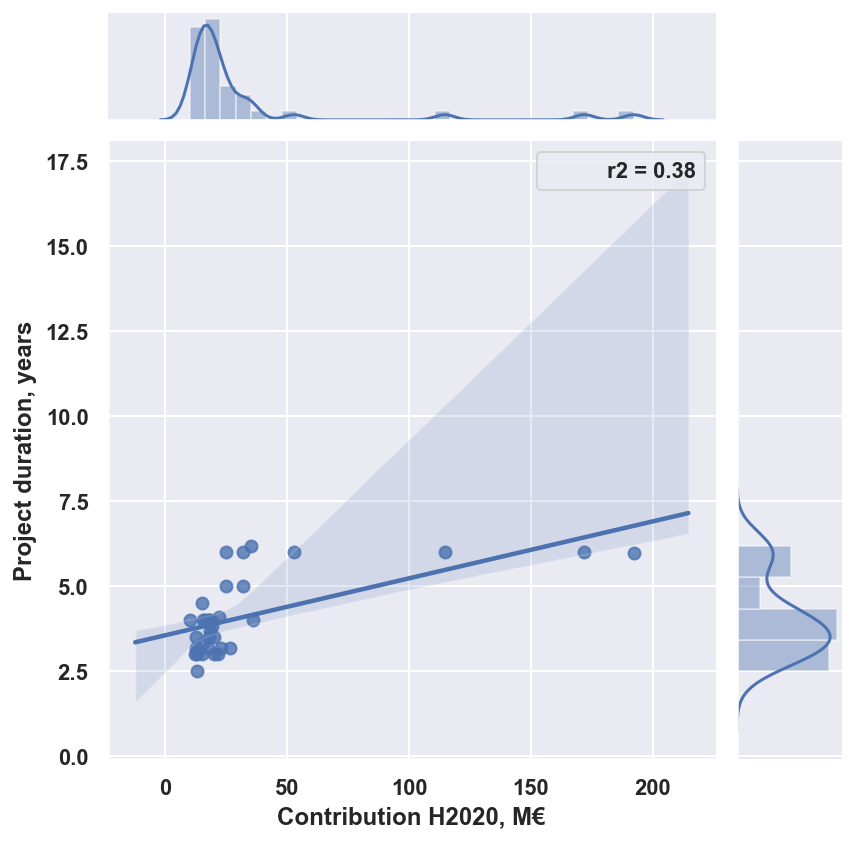

In [75]:
ax = sns.jointplot(df_expensive[df_expensive.frameworkProgramme == 'H2020']['contribution_mils'], \
              df_expensive[df_expensive.frameworkProgramme == 'H2020']['duration_years'], kind="reg", stat_func=r2)
ax.ax_joint.set_xlabel('Contribution H2020, M€', fontweight='bold')
ax.ax_joint.set_ylabel('Project duration, years', fontweight='bold')

In [317]:
ax.savefig("mr2_results/contribution_vs_duration_cheap_h2020.svg")
ax.savefig("mr2_results/contribution_vs_duration_cheap_h2020.png")

In [76]:
r2_fp7 = 0.059
r2_h2020 = 0.38

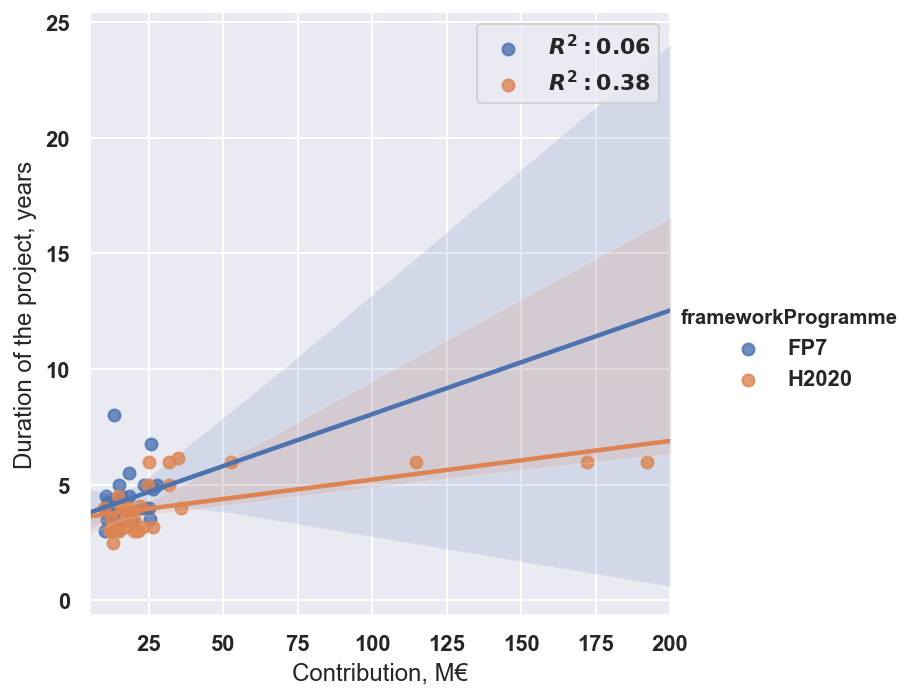

In [77]:
# cheap
ax = sns.lmplot(x = "contribution_mils", y = "duration_years", \
                data = df_expensive, \
                hue = 'frameworkProgramme', legend = True, fit_reg=True, logx=False)
ax.set(xlabel='Contribution, M€', ylabel='Duration of the project, years')

# limit the values
ax.set(xlim=(5, 200))
#ax.set(ylim=(0, 55))

# if R2 score is wanted
axs = ax.axes[0, 0]
axs.legend()
leg = axs.get_legend()
L_labels = leg.get_texts()

label_line_1 = r'$R^2:{0:.2f}$'.format(r2_fp7)
label_line_2 = r'$R^2:{0:.2f}$'.format(r2_h2020) # R2 scores calculated above
L_labels[0].set_text(label_line_1)
L_labels[1].set_text(label_line_2)


In [320]:
ax.savefig("mr2_results/contribution_vs_duration_years_expensive.svg")
ax.savefig("mr2_results/contribution_vs_duration_years_expensive.png")

# Financing per project per entity

In [66]:
projects.head(2)

id acronym_x                                         clean_text  \
0  211625     ASSET  asset aeronautic study seamless transport airp...   
1  211723   MEFISTO  methodology framework programme impact assessm...   

      score framework        t0        t1        t2        t3        t4  ...  \
0  0.572112       FP7  0.006421  0.000963  0.221254  0.000673  0.001573  ...   
1  0.124785       FP7  0.102328  0.000448  0.069606  0.023820  0.000734  ...   

   workPerformed  contribution  start  \
0            NaN     2291255.0   2008   
1            NaN      395939.0   2008   

                                        entities_all         countries_all  \
0  DEUTSCHES ZENTRUM FUER LUFT - UND RAUMFAHRT EV...     DE;FR;EL;DE;UK;SK   
1  L - UP SAS;AEROSPACE AND DEFENCE INDUSTRIES AS...  FR;BE;UK;PL;NL;DE;FR   

  members_number countries_number duration_days contribution_mils  \
0             15                5        1277.0          2.291255   
1              8                6         637.0          0.395939   

  duration_years  
0       3.498630  
1       1.745205  

[2 rows x 54 columns]

In [67]:
# sum contributions per coordinating entity and count number of projects
df_coordinators = projects.groupby(['coordinator']).sum()[["contribution", "duration_years", "contribution_mils", \
                                                           "members_number"]].reset_index()

df_coordinators.rename({'contribution':'total_contribution', "duration_years":"total_duration_years", \
                       "contribution_mils":"total_contribution_mils", 'members_number':'total_num_entities'}, inplace=True, axis=1)

df_coordinators['total_num_projects'] = list(projects.groupby(['coordinator']).count()['contribution'])


In [68]:
df_coordinators['contribution_per_project'] = df_coordinators.total_contribution / df_coordinators.total_num_projects

df_coordinators['contribution_per_project_year'] = df_coordinators.total_contribution / \
                                (df_coordinators.total_num_projects * df_coordinators.total_duration_years)


df_coordinators['contribution_per_project_member'] = df_coordinators.total_contribution / \
                                (df_coordinators.total_num_projects * df_coordinators.total_num_entities)


df_coordinators['contribution_per_project_year_entity'] = df_coordinators.total_contribution / \
                                (df_coordinators.total_num_projects * df_coordinators.total_duration_years * df_coordinators.total_num_entities)

In [69]:
df_coordinators.sort_values(by=["contribution_per_project"], inplace=True, axis=0, ascending=False)
df_coordinators.reset_index(inplace=True)
df_coordinators.drop("index", inplace=True, axis=1)

In [70]:
df_coordinators.head()

coordinator  total_contribution  total_duration_years  \
0     MTU AERO ENGINES AG        1.983793e+08             10.827397   
1                  AIRBUS        2.187770e+08             16.558904   
2  AGUSTAWESTLAND LIMITED        2.781368e+07              5.000000   
3   THALES AVS FRANCE SAS        1.650860e+08             23.821918   
4  ELEMENT ENERGY LIMITED        1.308224e+08             28.421918   

   total_contribution_mils  total_num_entities  total_num_projects  \
0               198.379286                  65                   2   
1               218.776999                 102                   5   
2                27.813675                  42                   1   
3               165.085961                 158                   6   
4               130.822357                 134                   5   

   contribution_per_project  contribution_per_project_year  \
0              9.918964e+07                   9.160987e+06   
1              4.375540e+07                   2.642409e+06   
2              2.781368e+07                   5.562735e+06   
3              2.751433e+07                   1.155000e+06   
4              2.616447e+07                   9.205737e+05   

   contribution_per_project_member  contribution_per_project_year_entity  
0                     1.525995e+06                         140938.258156  
1                     4.289745e+05                          25905.972097  
2                     6.622304e+05                         132446.071429  
3                     1.741413e+05                           7310.129699  
4                     1.952572e+05                           6869.953316

In [83]:
df_coordinators.to_csv("mr2_results/coordinator_financing_metrics.csv")

# Analysis of topic distributions

In [71]:
"""
How many projects fit into a topic with a probability higher than p?
"""

def count_fitting_projects(df, p = 0.2, n_topics = 10):
    count_projects = []
    
    for i in range(n_topics):
        x = np.sum(df["t" + str(i)] >= p)
        count_projects.append(x)
    
    return count_projects

In [72]:
projects_per_topic = count_fitting_projects(mr2_projects, p = 0.2, n_topics = 9)

projects_per_topic

[195, 230, 324, 77, 129, 206, 196, 171, 214]

In [73]:
# New dataframe: projects assignment per clouds

projects_per_clouds = mr2_projects.loc[:, 't0':'t8']
projects_per_clouds.insert(loc=0, column='title', value = mr2_projects['title'])
projects_per_clouds.insert(loc=0, column='id', value = mr2_projects['id'])

p = 0.2
for i in range(9):
    projects_per_clouds['t' + str(i)] = projects_per_clouds['t' + str(i)] < p


projects_per_clouds.head()

id                                              title    t0     t1  \
0  211625     ASSET – Aeronautic Study on Seamless Transport  True   True   
1  211723  Methodology for framework programmes’ impact a...  True   True   
2  212785  i-Travel - Service Platform for the Connected ...  True  False   
3  213061   Integrated Airport Apron Safety Fleet Management  True   True   
4  213233  Wide Scale network of E-systems for Multimodal...  True  False   

      t2     t3     t4     t5    t6     t7     t8  
0  False   True   True  False  True  False   True  
1   True   True   True   True  True  False  False  
2  False   True   True   True  True   True   True  
3  False  False  False   True  True   True   True  
4  False   True   True   True  True   True   True

In [87]:
projects_per_clouds.to_csv("mr2_results/projects_per_topic_clouds.csv")
#projects_per_clouds.to_excel("mr2_results/projects_per_topic_clouds.xlsx")

### Topic distribution

In [74]:
projects.head(3)

id acronym_x                                         clean_text  \
0  211625     ASSET  asset aeronautic study seamless transport airp...   
1  211723   MEFISTO  methodology framework programme impact assessm...   
2  212785   ITRAVEL  service platform connected traveller original ...   

      score framework        t0        t1        t2        t3        t4  ...  \
0  0.572112       FP7  0.006421  0.000963  0.221254  0.000673  0.001573  ...   
1  0.124785       FP7  0.102328  0.000448  0.069606  0.023820  0.000734  ...   
2  0.308535       FP7  0.001245  0.428587  0.338383  0.000308  0.046538  ...   

   workPerformed  contribution  start  \
0            NaN     2291255.0   2008   
1            NaN      395939.0   2008   
2            NaN     1458273.0   2008   

                                        entities_all  \
0  DEUTSCHES ZENTRUM FUER LUFT - UND RAUMFAHRT EV...   
1  L - UP SAS;AEROSPACE AND DEFENCE INDUSTRIES AS...   
2  EUROPEAN ROAD TRANSPORT TELEMATICS IMPLEMENTAT...   

                   countries_all members_number countries_number  \
0              DE;FR;EL;DE;UK;SK             15                5   
1           FR;BE;UK;PL;NL;DE;FR              8                6   
2  BE;EL;NL;DE;IT;BE;HU;ES;FR;DK             19                9   

  duration_days contribution_mils duration_years  
0        1277.0          2.291255       3.498630  
1         637.0          0.395939       1.745205  
2         638.0          1.458273       1.747945  

[3 rows x 54 columns]

In [75]:
projects.columns.values

array(['id', 'acronym_x', 'clean_text', 'score', 'framework', 't0', 't1',
       't2', 't3', 't4', 't5', 't6', 't7', 't8', 'index', 'acronym_y',
       'call', 'coordinator', 'coordinatorCountry', 'ecMaxContribution',
       'endDate', 'finalResults', 'frameworkProgramme', 'fundingScheme',
       'lastUpdateDate', 'objective', 'participantCountries',
       'participants', 'programme', 'projectAcronym', 'projectID',
       'projectUrl', 'rcn', 'rcn_report', 'relatedFile', 'startDate',
       'status', 'subjects', 'summary', 'title', 'title_report', 'topics',
       'totalCost', 'url', 'workPerformed', 'contribution', 'start',
       'entities_all', 'countries_all', 'members_number',
       'countries_number', 'duration_days', 'contribution_mils',
       'duration_years'], dtype=object)

### Existing metrics

In [76]:
print("Score: ", np.max(projects.score), np.min(projects.score))

Score:  0.9808760346267704 0.09591855557645314


# Load dominant topics table

In [77]:
dominant_topics = pd.read_csv("mr2_results/dominant_topic_per_project_numtopics9version_v2_0.csv", index_col=0, \
                             usecols = ["Document_No", "Dominant_Topic", "Topic_Perc_Contrib", "Project_Title"])

In [78]:
dominant_topics.head()

Dominant_Topic  Topic_Perc_Contrib  \
Document_No                                       
0                       5.0              0.3092   
1                       8.0              0.5163   
2                       1.0              0.4286   
3                       3.0              0.2970   
4                       1.0              0.5105   

                                                 Project_Title  
Document_No                                                     
0               ASSET – Aeronautic Study on Seamless Transport  
1            Methodology for framework programmes’ impact a...  
2            i-Travel - Service Platform for the Connected ...  
3             Integrated Airport Apron Safety Fleet Management  
4            Wide Scale network of E-systems for Multimodal...

In [79]:
projects["dominant_cloud"] = dominant_topics["Dominant_Topic"]
projects["dominant_cloud_weight"] = dominant_topics["Topic_Perc_Contrib"]

In [80]:
## add cloud number as defined in MR
projects["cloud_mr"] = projects["dominant_cloud"] + 1

#### Dominance level

We define DOMINANCE LEVEL as the ratio between the weight of the dominant cloud of a project and the 2nd highest weight in the topic distribution.

As such, dominance level can be:
- 0.5 / 0.5 = 1
- 0.5 / (0.5/8) = 8
- .11 / .11 = 1
- 0.9 / 0.1 = 9 etc.

In general, dominance level will be at least 1 (no real dominance), with values close to 8 presenting topics that are extremely highly determined by that one topic cloud.

In [81]:
# for a project, calculated dominance level
def calc_dominance_level(p):
    # p is a row from projects dataframe
    
    second_highest = sorted(p['t0':'t8'])[-2] # sorts them from lowest to highest
    return p.dominant_cloud_weight / second_highest

In [82]:
#sorted(projects.iloc[0,:]['t0':'t8'])[-2]

In [83]:
projects["dominance_level"] = projects.apply(calc_dominance_level, axis=1)

In [84]:
# sort projects by dominance level

projects.sort_values(by="dominance_level", axis=0)

id          acronym_x  \
441  314087  RESILIENCE2050.EU   
331  225354              SERON   
821  686509             E-TSIN   
432  297956         CROWDFLOWS   
33   234027            SAVE ME   
..      ...                ...   
386  266176              NEARS   
299  864551              ELICA   
809  640480          SUNJET II   
358  241905               TASS   
400  284875         AERA - Pro   

                                            clean_text     score framework  \
441  new design principle foster safety agility res...  0.332033       FP7   
331  security road transport networks european road...  0.297054       FP7   
821  modular scalable high power density power cont...  0.670205     H2020   
432  crowdflows crowdsourcing travel demand predict...  0.638288       FP7   
33   system actions vehicles transportation hub sup...  0.106465       FP7   
..                                                 ...       ...       ...   
386  new european aviation strategy proposal propos...  0.882584       FP7   
299  electric innovative commuter aircraft electric...  0.466043     H2020   
809  sustainable network aerospace technology coope...  0.181627     H2020   
358  total airport security system tass intelligenc...  0.185197       FP7   
400  aeronautics air transport european agenda prom...  0.878756       FP7   

           t0        t1        t2        t3        t4  ...  \
441  0.000636  0.000211  0.074023  0.199941  0.000349  ...   
331  0.004239  0.000050  0.028986  0.368901  0.012667  ...   
821  0.229361  0.000269  0.192396  0.000188  0.128569  ...   
432  0.082392  0.308915  0.056855  0.000796  0.001927  ...   
33   0.001461  0.261691  0.260692  0.203556  0.021931  ...   
..        ...       ...       ...       ...       ...  ...   
386  0.028344  0.000095  0.046937  0.000066  0.004869  ...   
299  0.915294  0.001563  0.043237  0.001084  0.029634  ...   
809  0.037432  0.000323  0.037941  0.000225  0.000534  ...   
358  0.000105  0.027880  0.826520  0.029815  0.022750  ...   
400  0.001055  0.000369  0.002919  0.000257  0.000601  ...   

                     countries_all  members_number  countries_number  \
441              ES;NL;TR;DE;ES;UK               7                 5   
331           DE;AT;BE;DK;UK;CH;DE               7                 6   
821                          ES;ES               2                 1   
432                             PT               1                 0   
33            UK;LU;EL;CH;IT;DE;ES              11                 6   
..                             ...             ...               ...   
386                       DE;BE;NL               3                 2   
299                    DE;IT;BE;DE               5                 3   
809              FR;NL;FR;UK;DE;BE               7                 5   
358  IL;IT;PT;SE;EL;IE;IL;FR;UK;ES              22                 9   
400                       BE;BE;DE               3                 2   

     duration_days  contribution_mils duration_years dominant_cloud  \
441         1308.0           2.186091       3.583562            5.0   
331         1095.0           2.246110       3.000000            7.0   
821         1551.0           1.650000       4.249315            0.0   
432            NaN           0.342142            NaN            8.0   
33          1095.0           2.914534       3.000000            1.0   
..             ...                ...            ...            ...   
386          638.0           0.470375       1.747945            8.0   
299         1095.0           0.750000       3.000000            0.0   
809         1004.0           0.612652       2.750685            8.0   
358         1460.0           8.986696       4.000000            2.0   
400          455.0           0.300359       1.246575            8.0   

    dominant_cloud_weight cloud_mr dominance_level  
441                0.2577      6.0        0.999968  
331                0.3692      8.0        1.000811  
821                0.2294      1.0       

# Average representation of a topic

In [85]:
# average columns t0 - t8 across all projects
topic_dist = projects.loc[:, "t0":"t8"].values
topic_dist.shape

(926, 9)

In [86]:
topic_representation = np.mean(topic_dist, axis=0) * 100
topic_representation.shape

(9,)

In [87]:
np.sum(topic_representation)

99.9999999600729

In [88]:
topic_representation

array([11.4314482 , 12.5512246 , 16.86828681,  5.05906   ,  8.88804739,
       10.77068423, 11.04252079,  9.44992704, 13.9388009 ])

In [89]:
clouds = [
    '1. Green aircraft technologies of the future',
    '2. Novel concepts in mobility',
    '3. Security systems in transport and mobility',
    '4. Intelligent machines and automation in transport',
    '5. Green urban mobility technologies',
    '6. Air traffic management',
    '7. Transport models harnessing the power of data',
    '8. Multimodal transport networks for both passengers and freight',
    '9. High level strategies for transport innovation'
]

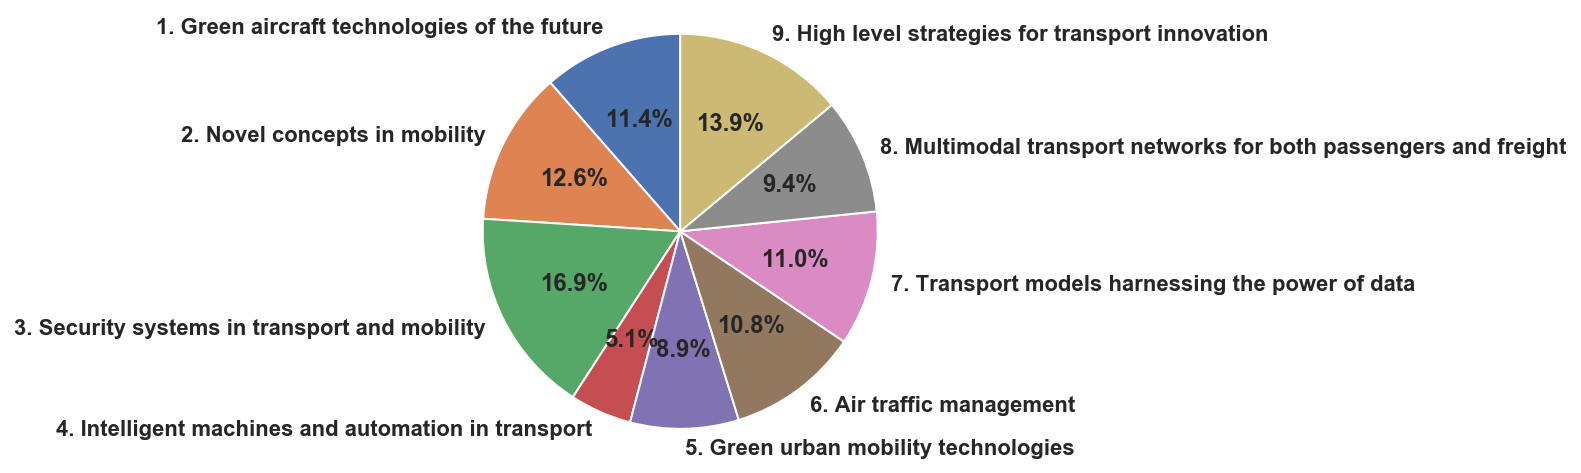

<Figure size 432x288 with 0 Axes>

In [93]:
labels = clouds
sizes = topic_representation
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#plt.savefig("mr2_results/topic_representation_pie_chart.svg")
#plt.savefig("mr2_results/topic_representation_pie_chart.png") #SAVE MANUALLY - THIS CUTS OF THE LABELS!!

fig = plt.gcf()  # THIS IS TO COMBAT THE PROBLEM OF SAVING BLANK image that matplotlib sometimes does
plt.show()
plt.draw()

In [94]:
fig.savefig("mr2_results/topic_representation_pie_chart.svg")
fig.savefig("mr2_results/topic_representation_pie_chart.png") #SAVE MANUALLY - THIS CUTS OF THE LABELS!!

## Relative financing each topic received

Multiply topic distribution with financing of each project.

In [95]:
df_topics = pd.DataFrame(clouds, columns = ['cloud'])
df_topics["cloud_number"] = list(range(1,10))
df_topics

cloud  cloud_number
0       1. Green aircraft technologies of the future             1
1                      2. Novel concepts in mobility             2
2      3. Security systems in transport and mobility             3
3  4. Intelligent machines and automation in tran...             4
4               5. Green urban mobility technologies             5
5                          6. Air traffic management             6
6   7. Transport models harnessing the power of data             7
7  8. Multimodal transport networks for both pass...             8
8  9. High level strategies for transport innovation             9

In [96]:
relative_financing_clouds = np.matmul(topic_dist.T, projects['contribution_mils'].values)
relative_financing_clouds.shape

(9,)

In [97]:
relative_financing_clouds

array([509.01889085, 321.04858135, 657.5427603 , 160.12176998,
       426.07278732, 367.76428746, 310.36479369, 258.25810121,
       417.33092392])

In [98]:
# RELATIVE FINANCING SEPARATED FOR FP7 and H2020
topic_dist_fp7 = projects[projects.frameworkProgramme == "FP7"].loc[:, "t0":"t8"].values
print(topic_dist_fp7.shape)

topic_dist_h2020 = projects[projects.frameworkProgramme == "H2020"].loc[:, "t0":"t8"].values
print(topic_dist_h2020.shape)

(407, 9)
(519, 9)


In [99]:
relative_financing_fp7 = np.matmul(topic_dist_fp7.T, projects[projects.frameworkProgramme == "FP7"]['contribution_mils'].values)
relative_financing_h2020 = np.matmul(topic_dist_h2020.T, projects[projects.frameworkProgramme == "H2020"]['contribution_mils'].values)

In [100]:
projects.dominant_cloud

0      5.0
1      8.0
2      1.0
3      3.0
4      1.0
      ... 
921    6.0
922    0.0
923    4.0
924    5.0
925    2.0
Name: dominant_cloud, Length: 926, dtype: float64

In [101]:
df_topics["topic_financing"] = relative_financing_clouds
df_topics["topic_financing_fp7"] = relative_financing_fp7
df_topics ["topic_financing_h2020"] = relative_financing_h2020

df_topics["topic_financing_perc"] = relative_financing_clouds / sum(relative_financing_clouds) * 100
df_topics["topic_financing_fp7_perc"] = relative_financing_fp7 / sum(relative_financing_fp7) * 100
df_topics ["topic_financing_h2020_perc"] = relative_financing_h2020 / sum(relative_financing_h2020) * 100

# project duration per topics - TAKE INTO ACCOUNT JUST DOMINANT CLOUDS!
df_topics["topic_duration"] = [0] * 9
for i in range(9):
    df_topics.loc[i, "topic_duration"] = np.round(np.nanmean(projects[projects.dominant_cloud == i]['duration_years']), 2) #ignore NaNs

# projects consortium size per topic
df_topics["topic_consortium_size"] = [0] * 9
for i in range(9):
    df_topics.loc[i, "topic_consortium_size"] = np.round(np.nanmean(projects[projects.dominant_cloud == i]['members_number']), 2) #ignore NaNs


In [102]:
df_topics

cloud  cloud_number  \
0       1. Green aircraft technologies of the future             1   
1                      2. Novel concepts in mobility             2   
2      3. Security systems in transport and mobility             3   
3  4. Intelligent machines and automation in tran...             4   
4               5. Green urban mobility technologies             5   
5                          6. Air traffic management             6   
6   7. Transport models harnessing the power of data             7   
7  8. Multimodal transport networks for both pass...             8   
8  9. High level strategies for transport innovation             9   

   topic_financing  topic_financing_fp7  topic_financing_h2020  \
0       509.018891           149.375774             359.643117   
1       321.048581           117.415434             203.633147   
2       657.542760           219.051483             438.491277   
3       160.121770            75.139812              84.981958   
4       426.072787           200.577496             225.495291   
5       367.764287            92.796253             274.968034   
6       310.364794           130.052336             180.312458   
7       258.258101           113.892890             144.365211   
8       417.330924           178.828032             238.502892   

   topic_financing_perc  topic_financing_fp7_perc  topic_financing_h2020_perc  \
0             14.850926                 11.696212                   16.724527   
1              9.366782                  9.193698                    9.469577   
2             19.184197                 17.151861                   20.391212   
3              4.671647                  5.883492                    3.951926   
4             12.430925                 15.705337                   10.486234   
5             10.729740                  7.266002                   12.786871   
6              9.055076                 10.183175                    8.385092   
7              7.534832                  8.917881                    6.713433   
8             12.175876                 14.002341                   11.091128   

   topic_duration  topic_consortium_size  
0            2.72                   9.28  
1            2.32                   9.07  
2            2.37                   9.53  
3            3.26                  13.48  
4            3.07                  14.37  
5            2.52                   8.99  
6            2.92                   5.79  
7            2.68                  12.12  
8            2.73                  11.34

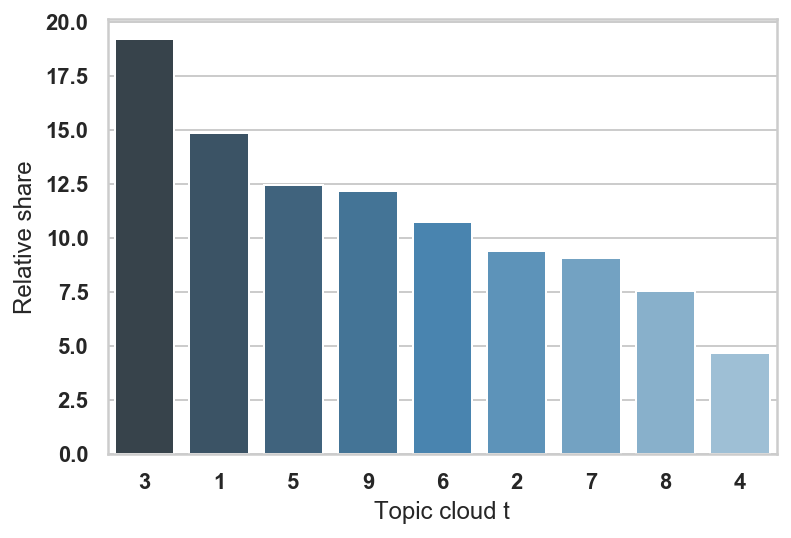

In [355]:
# General bar chart for financing per topics
sns.set(style="whitegrid")
df_temp = df_topics.sort_values(by="topic_financing", ascending=False).reset_index(drop=True)
ax = sns.barplot(x="cloud_number", y="topic_financing_perc", data=df_topics,\
                 order=df_temp['cloud_number'], palette = "Blues_d")
ax.set(ylabel="Relative share")
ax.set(xlabel="Topic cloud t")

#for item in ax.get_xticklabels():
#    item.set_rotation(30)

fig = ax.get_figure()

fig.savefig("mr2_results/relative_financing_topic_clouds.svg")
fig.savefig("mr2_results/relative_financing_topic_clouds.png")

In [118]:
# Show FP7 vs. H2020 comparison: tidy up the dataframe for that
tidy1 = df_topics[["cloud_number", "cloud", "topic_financing_h2020_perc"]]
tidy1.rename({'topic_financing_h2020_perc':'topic_financing_perc'}, inplace=True, axis=1)
tidy1["frameworkProgramme"] = ["H2020"] *tidy1.shape[0]

tidy2 = df_topics[["cloud_number", "cloud", "topic_financing_fp7_perc"]]
tidy2.rename({'topic_financing_fp7_perc':'topic_financing_perc'}, inplace=True, axis=1)
tidy2["frameworkProgramme"] = ["FP7"] *tidy2.shape[0]

tidy = tidy1.append(tidy2)
tidy.reset_index(drop=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pan

cloud_number                                              cloud  \
0              1       1. Green aircraft technologies of the future   
1              2                      2. Novel concepts in mobility   
2              3      3. Security systems in transport and mobility   
3              4  4. Intelligent machines and automation in tran...   
4              5               5. Green urban mobility technologies   
5              6                          6. Air traffic management   
6              7   7. Transport models harnessing the power of data   
7              8  8. Multimodal transport networks for both pass...   
8              9  9. High level strategies for transport innovation   
9              1       1. Green aircraft technologies of the future   
10             2                      2. Novel concepts in mobility   
11             3      3. Security systems in transport and mobility   
12             4  4. Intelligent machines and automation in tran...   
13             5               5. Green urban mobility technologies   
14             6                          6. Air traffic management   
15             7   7. Transport models harnessing the power of data   
16             8  8. Multimodal transport networks for both pass...   
17             9  9. High level strategies for transport innovation   

    topic_financing_perc frameworkProgramme  
0              16.724527              H2020  
1               9.469577              H2020  
2              20.391212              H2020  
3               3.951926              H2020  
4              10.486234              H2020  
5              12.786871              H2020  
6               8.385092              H2020  
7               6.713433              H2020  
8              11.091128              H2020  
9              11.696212                FP7  
10              9.193698                FP7  
11             17.151861                FP7  
12              5.883492                FP7  
13             15.705337                FP7  
14              7.266002                FP7  
15             10.183175                FP7  
16              8.917881                FP7  
17             14.002341                FP7

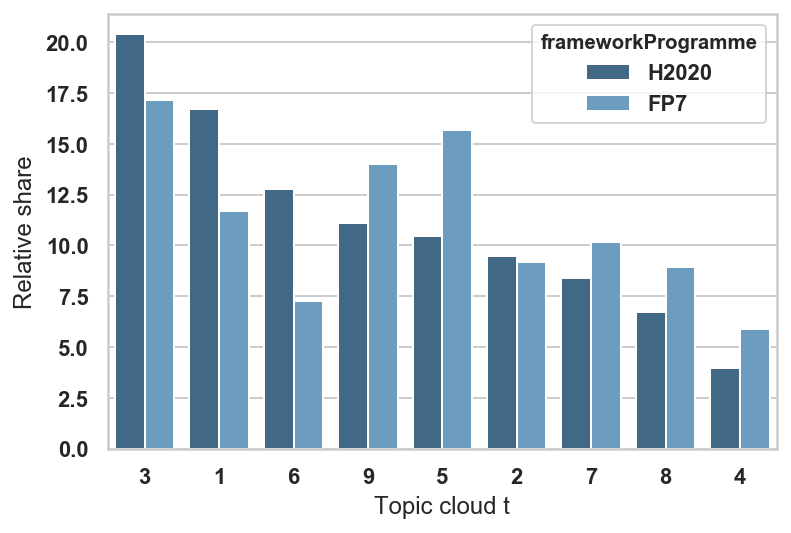

In [356]:
df_temp = tidy1.sort_values(by="topic_financing_perc", ascending=False).reset_index(drop=True)
ax = sns.barplot(x="cloud_number", y="topic_financing_perc", data=tidy,\
                 hue="frameworkProgramme", order=df_temp['cloud_number'], palette = "Blues_d")
ax.set(ylabel="Relative share")
ax.set(xlabel="Topic cloud t")

#for item in ax.get_xticklabels():
#    item.set_rotation(30)

fig = ax.get_figure()

fig.savefig("mr2_results/relative_financing_topic_clouds_fp7_vs_h2020.svg")
fig.savefig("mr2_results/relative_financing_topic_clouds_fp7_vs_h2020.png")

### Average project duration per topic (dominant clouds only)

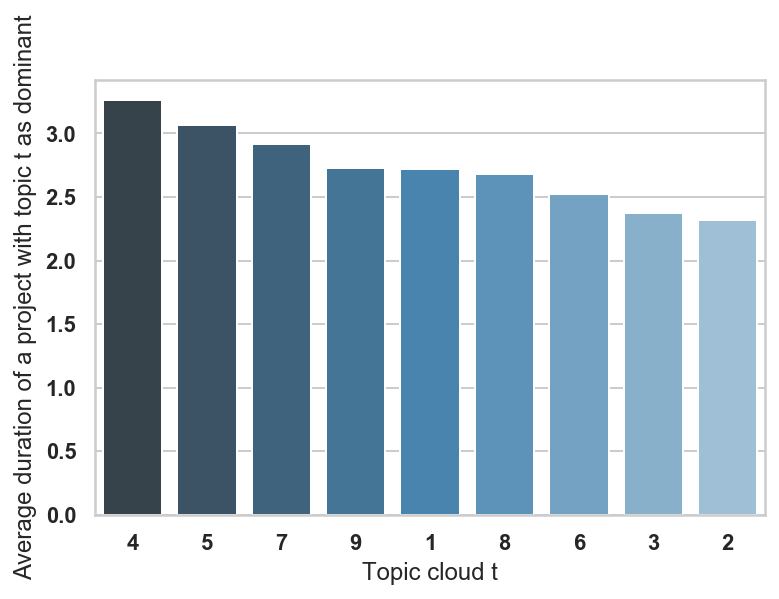

In [358]:
sns.set(style="whitegrid")
df_temp = df_topics.sort_values(by="topic_duration", ascending=False).reset_index(drop=True)
ax = sns.barplot(x="cloud_number", y="topic_duration", data=df_topics,\
                 order=df_temp['cloud_number'], palette = "Blues_d")
ax.set(xlabel = "Topic cloud t")
ax.set(ylabel="Average duration of a project with topic t as dominant")

#for item in ax.get_xticklabels():
#    item.set_rotation(30)

fig = ax.get_figure()

fig.savefig("mr2_results/average_topic_duration.svg")
fig.savefig("mr2_results/average_topic_duration.png")

### Average consortium size of a project per topic (dominant clouds only)

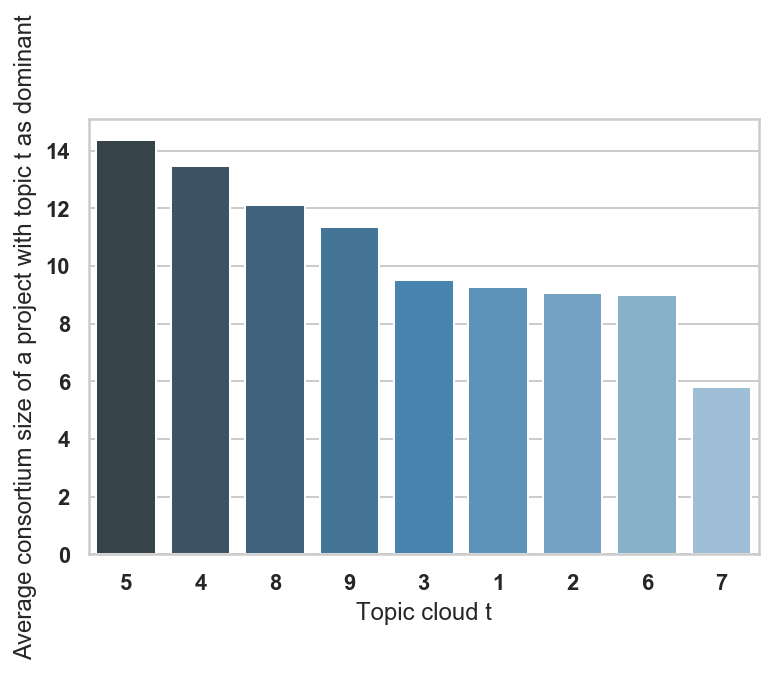

In [359]:
sns.set(style="whitegrid")
df_temp = df_topics.sort_values(by="topic_consortium_size", ascending=False).reset_index(drop=True)
ax = sns.barplot(x="cloud_number", y="topic_consortium_size", data=df_topics,\
                 order=df_temp['cloud_number'], palette = "Blues_d")
ax.set(xlabel = "Topic cloud t")
ax.set(ylabel="Average consortium size of a project with topic t as dominant")

#for item in ax.get_xticklabels():
#    item.set_rotation(30)

fig = ax.get_figure()

fig.savefig("mr2_results/average_topic_consortium_size.svg")
fig.savefig("mr2_results/average_topic_consortium_size.png")

# Trend analysis: how does focus on topics shift through years?

Important variables:
- start date of a project (year)
- LDA probability distribution of a topic


Note: One project misses its start date!!!

In [103]:
# start year of a project
projects['startYear'] = projects['startDate'].apply(lambda x: int(str(x)[0:4]) if not pd.isna(x) else 0)

In [104]:
# calculate average project weight grouped by start year
# as_index = False allows me to output a dataframe
rezz = projects.groupby('startYear', as_index = False)['t0','t1','t2','t3','t4','t5','t6','t7','t8'].mean()
rezz.drop(0, axis=0, inplace=True) # drop the missing data

In [105]:
rezz.head(2)

startYear        t0        t1        t2        t3        t4        t5  \
1       2007  0.105866  0.146079  0.095790  0.043111  0.009348  0.059860   
2       2008  0.079395  0.106728  0.113557  0.051904  0.088149  0.068494   

         t6        t7        t8  
1  0.023906  0.143691  0.372349  
2  0.082298  0.135227  0.274249

Text(0, 0.5, 'Project duration, years')

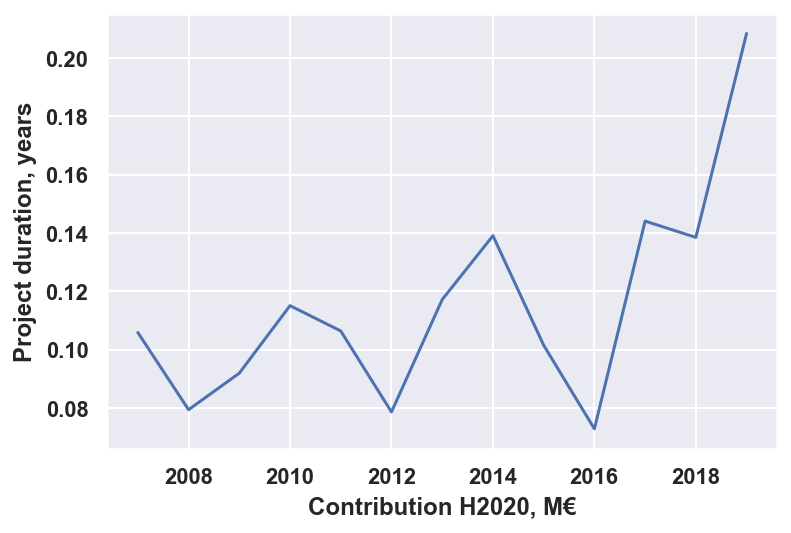

In [106]:
ax = sns.lineplot(x='startYear', y = 't0', data=rezz)

ax.set_xlabel('Contribution H2020, M€', fontweight='bold')
ax.set_ylabel('Project duration, years', fontweight='bold')

In [107]:
# Prepare the data
x = np.array(rezz.startYear) #years
y = np.array(np.array(rezz.loc[:,'t0':'t8']))
y.shape

(13, 9)

In [108]:
# TURN y INTO CUMMULATIVE SUM!!! - to analyse trend

y_cum = np.zeros(y.shape)
y_cum[0,:] = y[0,:]

for i in range(1, y.shape[0]):
    y_cum[i,:] = y_cum[i-1,:] + y[i,:]

# every row needs to be divided by the number of years
div_vec = np.array(list(range(1,y.shape[0] + 1)))
y_cum = (y_cum  /div_vec[:,None])  *100
y_cum

array([[10.58660597, 14.60788368,  9.5789548 ,  4.31110832,  0.93475153,
         5.98601777,  2.39063109, 14.36909618, 37.2349482 ],
       [ 9.26304463, 12.64032941, 10.46734132,  4.7507307 ,  4.87481461,
         6.41771434,  5.3102386 , 13.94588209, 32.32990337],
       [ 9.2388753 , 11.5390318 , 11.99599707,  5.54248599,  5.31753401,
         7.63428944,  7.38785887, 13.72316056, 27.62076643],
       [ 9.8059008 , 10.52837645, 12.24244811,  5.17939763,  6.75956848,
         8.05954135,  9.22087106, 12.49086277, 25.71303292],
       [ 9.97239884, 11.15715236, 12.52484052,  5.3237752 ,  6.94773068,
         7.7276933 ,  9.9921339 , 12.41176859, 23.94250615],
       [ 9.62049258, 11.40430668, 12.50365401,  5.36055647,  7.77468241,
         8.2629572 ,  9.99671168, 12.47781637, 22.59882219],
       [ 9.91965663, 11.02394775, 12.76714835,  5.3829846 ,  8.14811782,
         8.56450611, 10.71055282, 11.642529  , 21.84055655],
       [10.41776065, 11.99600884, 13.1510989 ,  5.04233154,  8

In [109]:
plot_cum_sum = True # should we plot cumulative sum of probabilities to analyse trend?

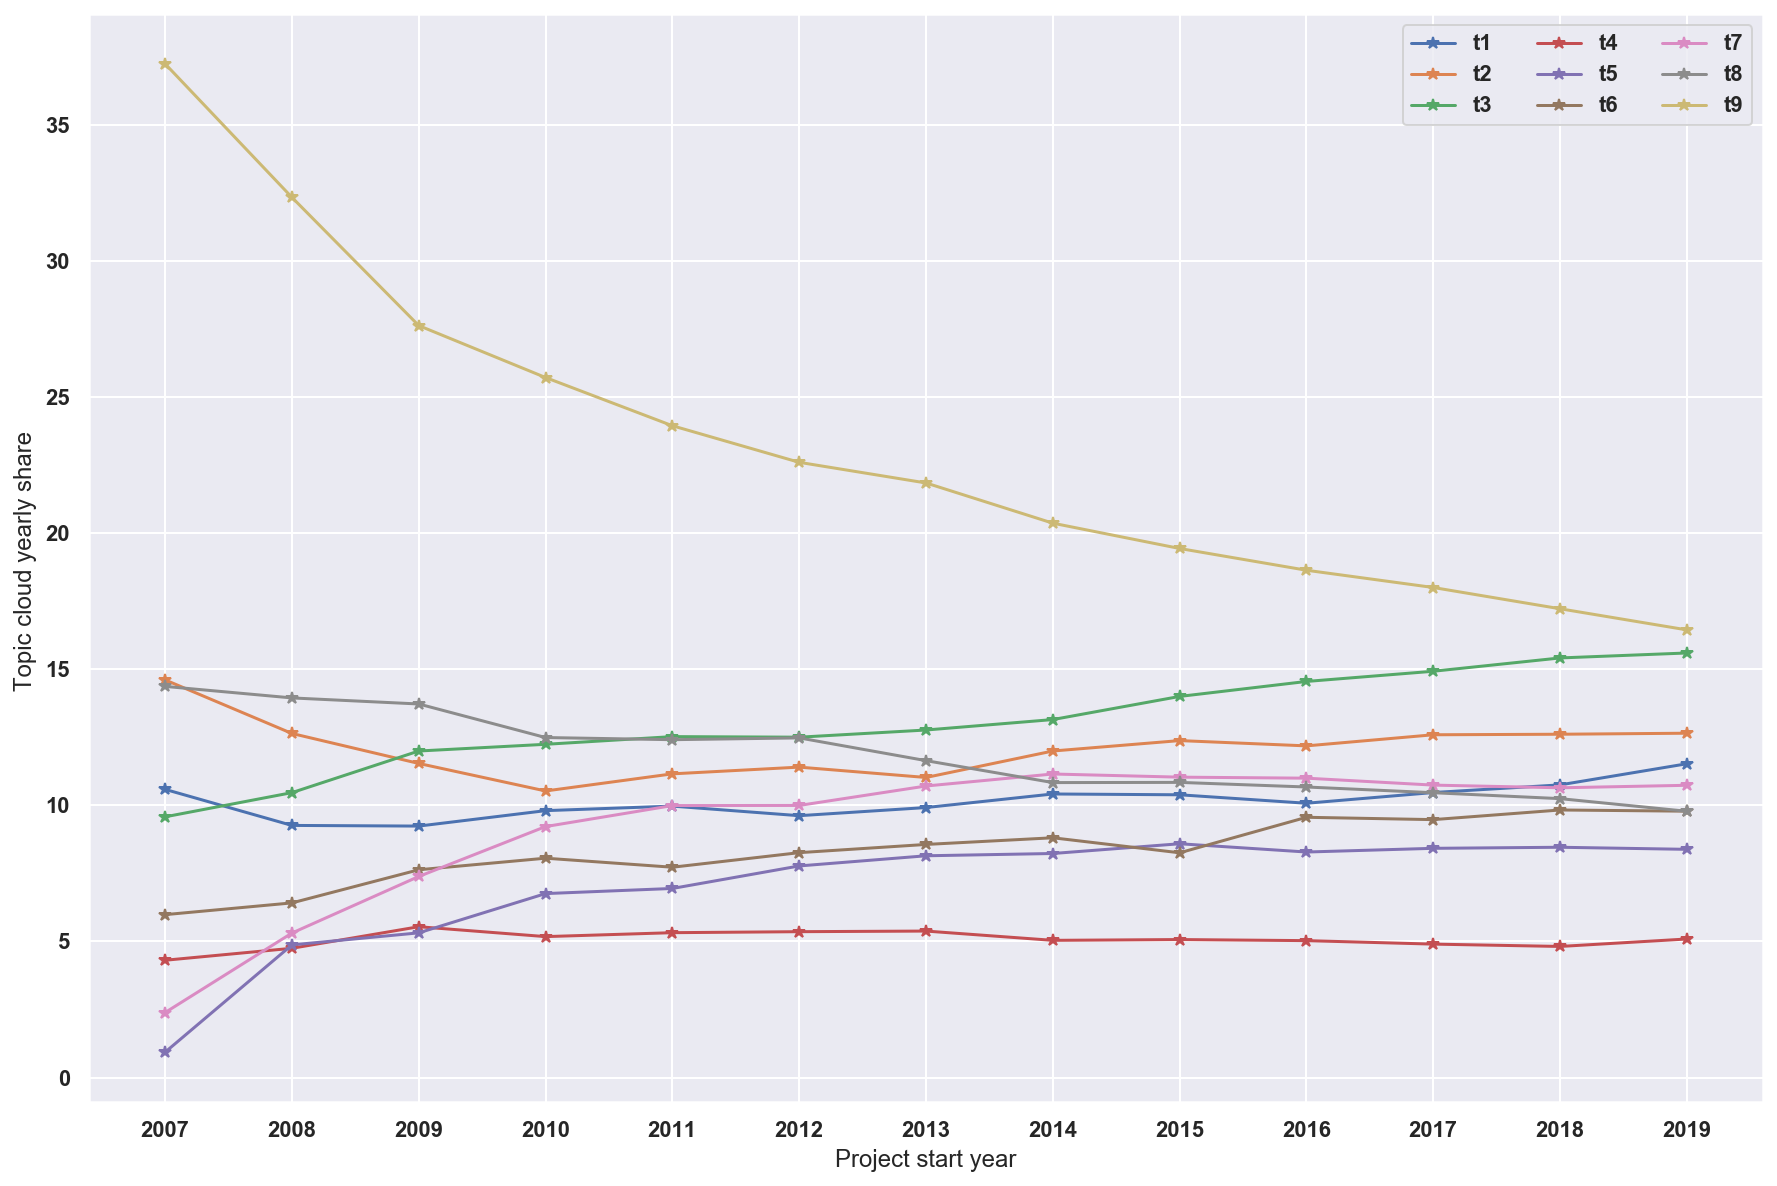

<Figure size 432x288 with 0 Axes>

In [118]:
# Plot the data with Matplotlib defaults

sns.set()

#linestyles = ['-', '--', '-.', ':', '^', 'o', '-*', ':', '-']

plt.figure(figsize=(15,10))

if plot_cum_sum:
    plt.plot(x, y_cum, '-*')
else:
    plt.plot(x, y*100, '-*')
    
plt.legend(['t1','t2','t3','t4','t5','t6','t7','t8', 't9'], ncol=3, loc='upper right');
plt.xticks(x)
plt.xlabel('Project start year')
plt.ylabel('Topic cloud yearly share ')

fig = plt.gcf()  # THIS IS TO COMBAT THE PROBLEM OF SAVING BLANK image that matplotlib sometimes does
plt.show()
plt.draw()

In [119]:
fig.savefig("mr2_results/topic_clouds_liveness.svg")
fig.savefig("mr2_results/topic_clouds_liveness.png")

#### separate the above visualisation into predominantly upward and downward trends

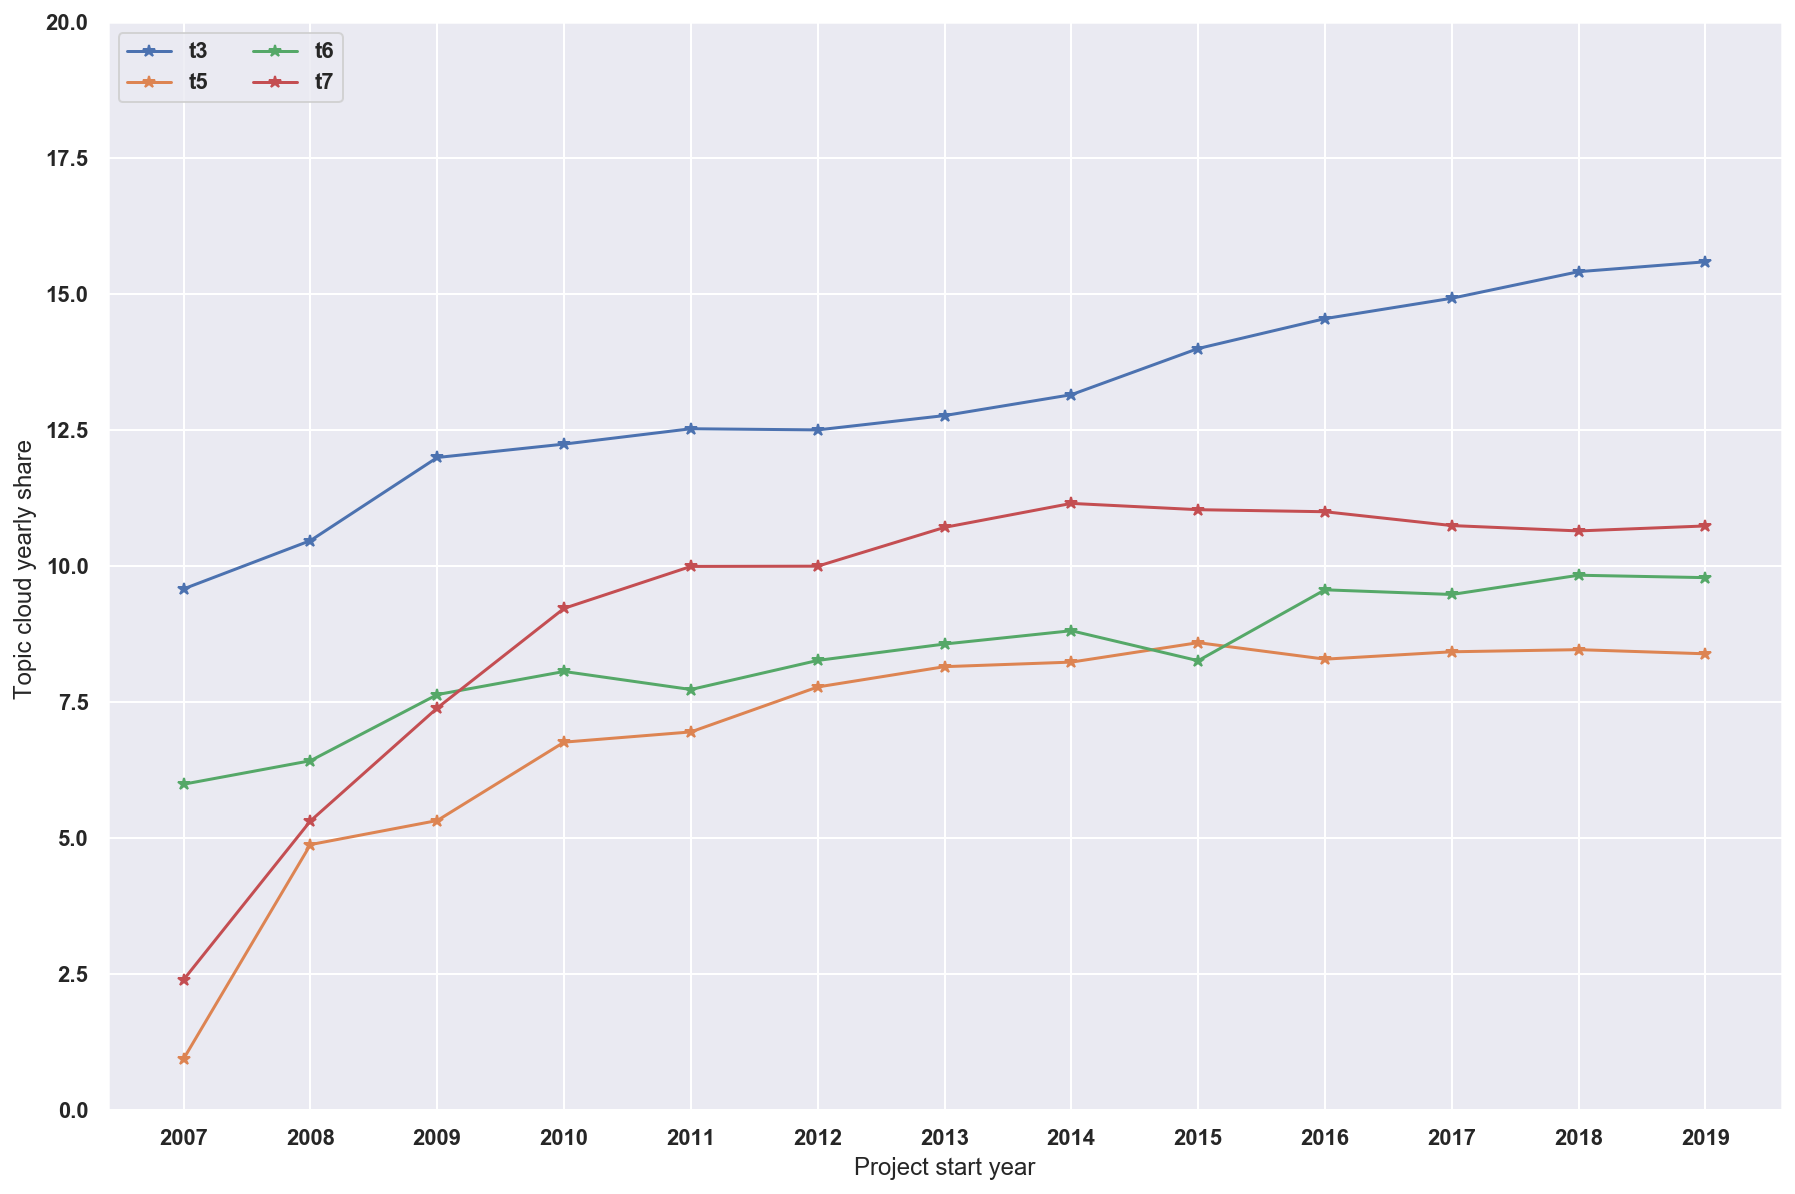

<Figure size 432x288 with 0 Axes>

In [120]:
# upward
y_upward = np.array(np.array(rezz[['t0','t1', 't2', 't5']]))

plt.figure(figsize=(15,10))

if plot_cum_sum:
    plt.plot(x, y_cum[:,[2,4, 5, 6]], '-*')
else:
    plt.plot(x, y_upward*100, '-*')
    

plt.legend(['t3', 't5', 't6', 't7'], ncol=2, loc='upper left');
plt.xticks(x)
if plot_cum_sum:
    plt.ylim([0, 20])
else:
    plt.ylim([0, 38])
plt.xlabel('Project start year')
plt.ylabel('Topic cloud yearly share ')

fig = plt.gcf()  # THIS IS TO COMBAT THE PROBLEM OF SAVING BLANK image that matplotlib sometimes does
plt.show()
plt.draw()

In [121]:
fig.savefig("mr2_results/topic_trends_up.svg")
fig.savefig("mr2_results/topic_trends_up.png")

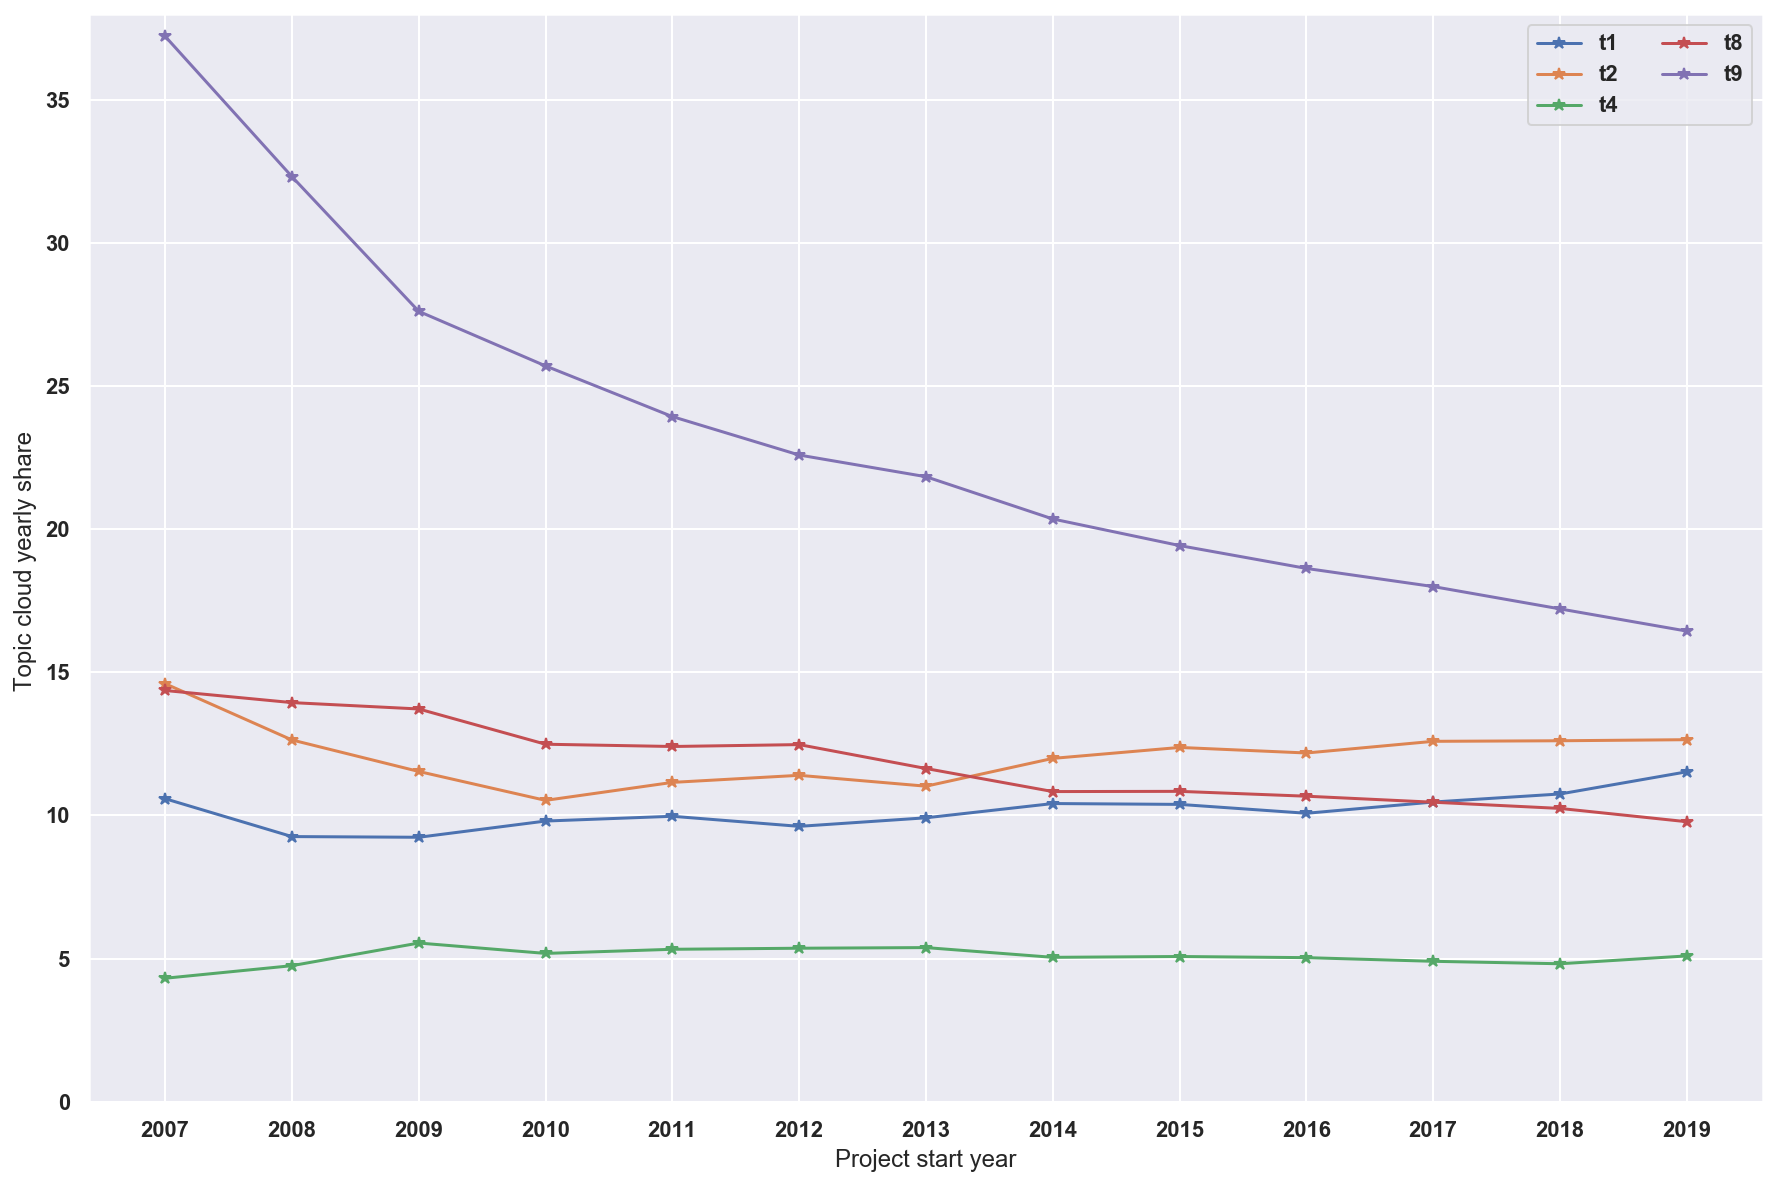

<Figure size 432x288 with 0 Axes>

In [122]:
# downward
y_downward = np.array(np.array(rezz[['t3','t4', 't6', 't7', 't8']]))

plt.figure(figsize=(15,10))

if plot_cum_sum:
    plt.plot(x, y_cum[:,[0,1, 3,7,8]], '-*')
else:
    plt.plot(x, y_downward*100, '-*')
    

plt.legend(['t1', 't2','t4', 't8', 't9'], ncol=2, loc='upper right');
plt.xticks(x)
plt.ylim([0, 38])
plt.xlabel('Project start year')
plt.ylabel('Topic cloud yearly share ')

fig = plt.gcf()  # THIS IS TO COMBAT THE PROBLEM OF SAVING BLANK image that matplotlib sometimes does
plt.show()
plt.draw()

In [123]:
fig.savefig("mr2_results/topic_trends_down.svg")
fig.savefig("mr2_results/topic_trends_down.png")

### Financing trends per year

In [132]:
projects_topic_financing = projects.loc[:,"t0":"t8"]
projects_topic_financing['startYear'] = projects['startYear']
projects_topic_financing.loc[:,"t0":"t8"] = projects_topic_financing.loc[:,"t0":"t8"].values * projects["contribution_mils"].values.reshape(-1,1)
projects_topic_financing.head()

t0        t1        t2        t3        t4        t5        t6  \
0  0.014712  0.002207  0.506948  0.001542  0.003603  0.707931  0.206115   
1  0.040516  0.000177  0.027560  0.009431  0.000291  0.000208  0.002350   
2  0.001816  0.624996  0.493455  0.000449  0.067865  0.000753  0.001652   
3  0.147912  0.002184  0.606241  0.701781  0.637048  0.257384  0.005234   
4  0.000143  0.733188  0.385417  0.002602  0.009877  0.006514  0.208536   

         t7        t8  startYear  
0  0.704847  0.143350       2008  
1  0.110970  0.204437       2008  
2  0.000471  0.266816       2008  
3  0.001594  0.003627       2008  
4  0.003469  0.086472       2008

In [133]:
topic_fin_trend = projects_topic_financing.groupby('startYear', as_index = False)['t0','t1','t2','t3','t4','t5','t6','t7','t8'].sum()
topic_fin_trend.drop(0, axis=0, inplace=True) # drop the missing data

In [134]:
topic_fin_trend

startYear          t0         t1          t2         t3         t4  \
1        2007    0.524828   0.975874    0.585509   0.287368   0.039723   
2        2008   27.915986  14.714655   17.364211  11.420028  18.366547   
3        2009   24.078895  12.037807   36.425582  10.497029   9.834278   
4        2010   20.157235  10.992165   31.727811  10.816413  42.251085   
5        2011   18.545009  30.382363   44.567075  16.699691  35.570359   
6        2012   14.425124  26.164336   26.256834  12.970270  37.134985   
7        2013   41.637942  17.549924   59.725140  11.949364  35.589892   
8        2014  223.857890  11.718423  143.954158   0.713391  23.032402   
9        2015   26.812662  57.502251   62.947867  14.436100  60.877309   
10       2016   12.460655  43.488796   91.035472  13.342737  44.227965   
11       2017   35.590703  39.273855   54.758685  22.169465  65.574302   
12       2018   39.350126  37.350711   67.484280  18.634129  44.928747   
13       2019   23.633646  18.791728   20.690684  16.185513   8.644537   

            t5         t6         t7         t8  
1     0.241080   0.156097   0.960317   1.574799  
2    12.061135  15.249566   9.776237  26.557923  
3    28.874002  24.180048  18.959295  22.098845  
4     7.700208  13.274806  14.902273  24.728354  
5     5.524778  20.719454  26.568363  36.910910  
6    11.027266  17.612467  21.510511  30.647171  
7    25.815699  35.470104  17.254011  30.473740  
8    67.035727  62.176858   2.513017  31.544471  
9    12.467085  30.538547  42.776189  41.758862  
10  148.273429  28.126773  35.428194  68.788867  
11   15.747835  26.453261  26.164568  44.411507  
12   21.800666  18.935308  33.245774  39.449852  
13   11.194921  17.400658   8.188756  18.279648

In [135]:
# Prepare the data
x_fin = np.array(topic_fin_trend.startYear) #years
y_fin = np.array(np.array(topic_fin_trend.loc[:,'t0':'t8']))
y_fin.shape

(13, 9)

In [141]:
# TURN y INTO CUMMULATIVE SUM!!! - to analyse trend

y_fin_cum = np.zeros(y_fin.shape)
y_fin_cum[0,:] = y_fin[0,:]

for i in range(1, y_fin.shape[0]):
    y_fin_cum[i,:] = y_fin_cum[i-1,:] + y_fin[i,:]

# every row needs to be divided by the number of years
div_vec = np.array(list(range(1,y_fin_cum.shape[0] + 1)))
y_fin_cum = (y_fin_cum  /div_vec[:,None])  *100
y_fin_cum

array([[5.24828458e+01, 9.75874467e+01, 5.85509133e+01, 2.87368173e+01,
        3.97225773e+00, 2.41079882e+01, 1.56097293e+01, 9.60317006e+01,
        1.57479889e+02],
       [1.42204073e+03, 7.84526468e+02, 8.97486010e+02, 5.85369798e+02,
        9.20313455e+02, 6.15110727e+02, 7.70283149e+02, 5.36827700e+02,
        1.40663609e+03],
       [1.75065700e+03, 9.24277885e+02, 1.81251006e+03, 7.40147515e+02,
        9.41351563e+02, 1.37254056e+03, 1.31952370e+03, 9.89861630e+02,
        1.67438558e+03],
       [1.81692363e+03, 9.68012530e+02, 2.15257782e+03, 8.25520957e+02,
        1.76229079e+03, 1.22191061e+03, 1.32151292e+03, 1.11495305e+03,
        1.87399803e+03],
       [1.82443908e+03, 1.38205729e+03, 2.61340375e+03, 9.94410588e+02,
        2.12123981e+03, 1.08802404e+03, 1.47159941e+03, 1.42332971e+03,
        2.23741663e+03],
       [1.76078463e+03, 1.58778667e+03, 2.61545037e+03, 1.04484665e+03,
        2.38661625e+03, 1.09047447e+03, 1.51987397e+03, 1.54461661e+03,
        2.3

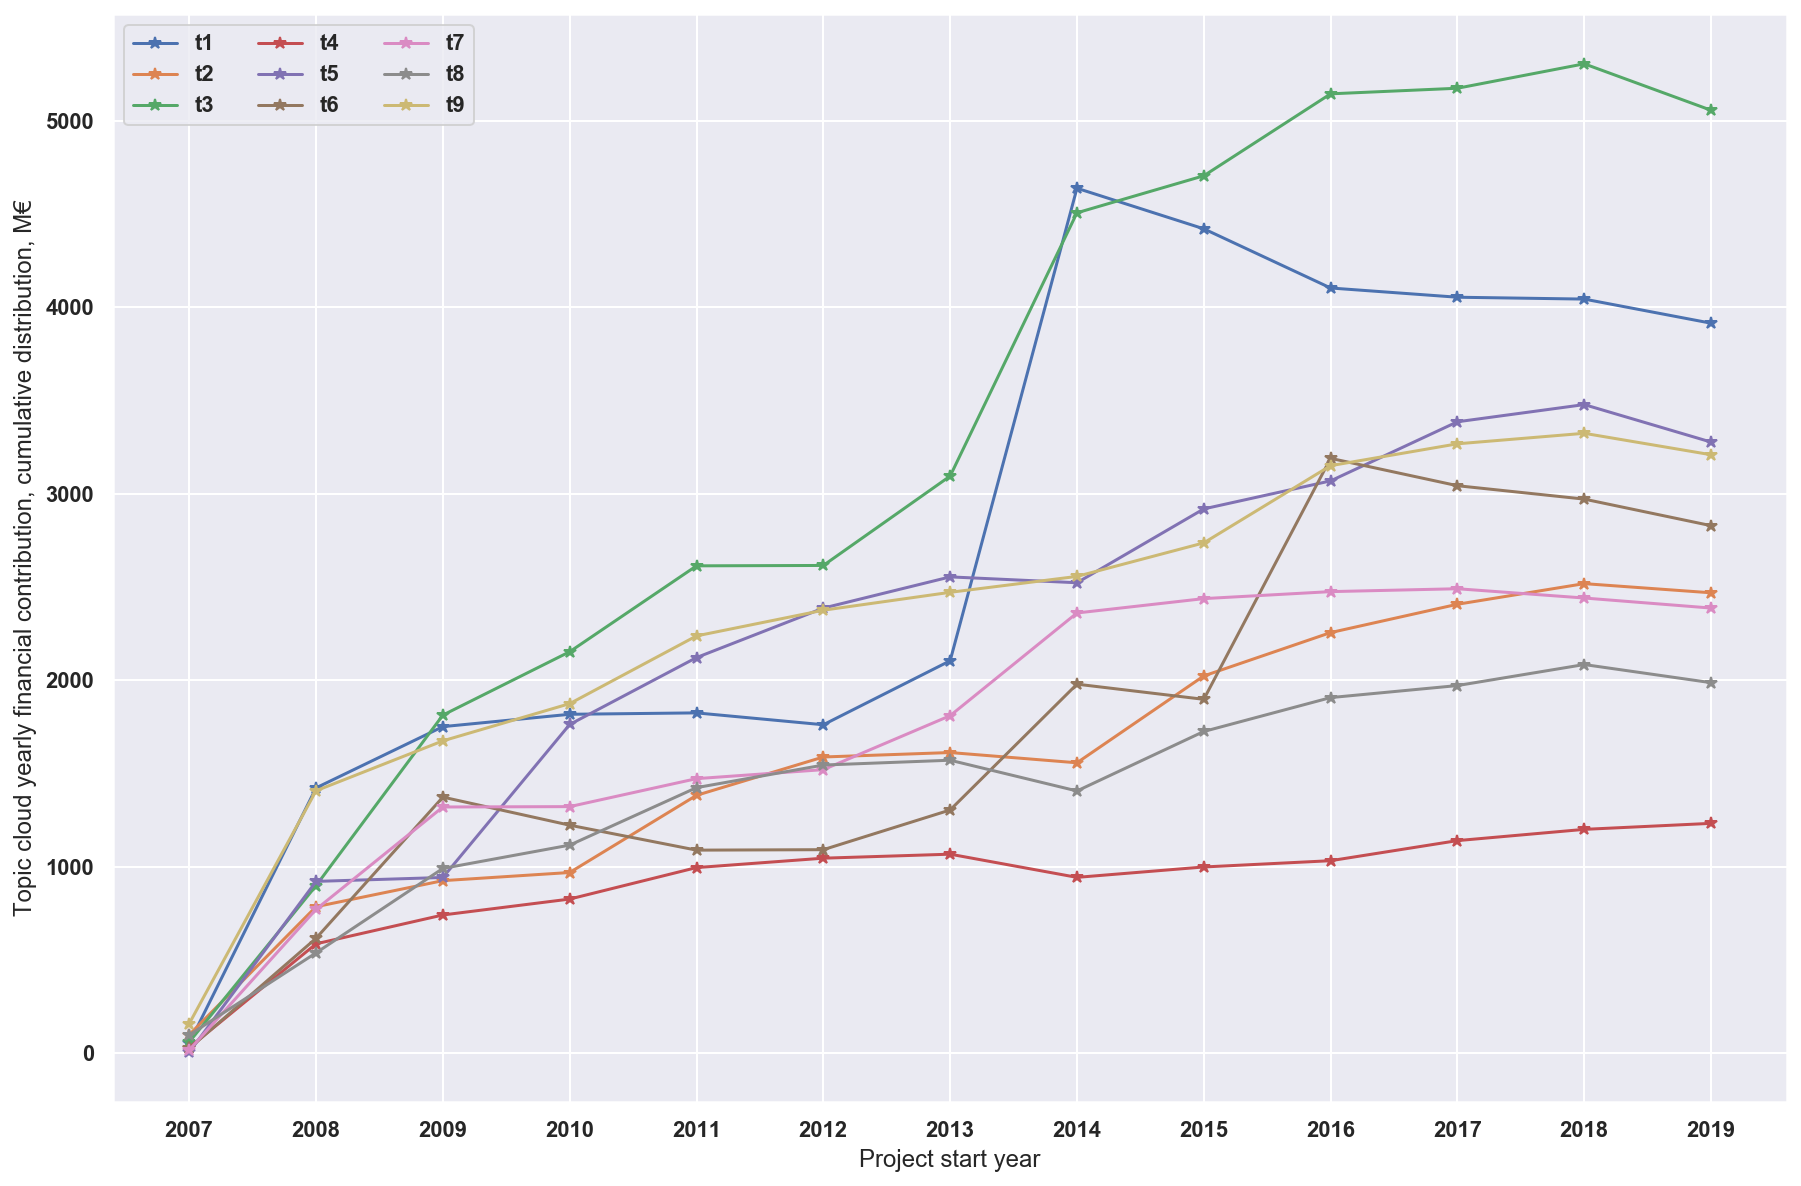

<Figure size 432x288 with 0 Axes>

In [142]:
sns.set()

plt.figure(figsize=(15,10))

plt.plot(x_fin, y_fin_cum, '-*')
    
plt.legend(['t1','t2','t3','t4','t5','t6','t7','t8', 't9'], ncol=3, loc='upper left');
plt.xticks(x)
plt.xlabel('Project start year')
plt.ylabel('Topic cloud yearly financial contribution, cumulative distribution, M€')

fig = plt.gcf()  # THIS IS TO COMBAT THE PROBLEM OF SAVING BLANK image that matplotlib sometimes does
plt.show()
plt.draw()

In [420]:
fig.savefig("mr2_results/financial_yearly_topic_trends_up.svg")
fig.savefig("mr2_results/financial_yearly_topic_trends_up.png")

# Countries' focus on topic clouds

In [143]:
print(projects.columns.values)

""" Relevant for this
- LDA distribution
- dominant_cloud
- countries_all
- coordinatorCountry
"""

['id' 'acronym_x' 'clean_text' 'score' 'framework' 't0' 't1' 't2' 't3'
 't4' 't5' 't6' 't7' 't8' 'index' 'acronym_y' 'call' 'coordinator'
 'coordinatorCountry' 'ecMaxContribution' 'endDate' 'finalResults'
 'frameworkProgramme' 'fundingScheme' 'lastUpdateDate' 'objective'
 'participantCountries' 'participants' 'programme' 'projectAcronym'
 'projectID' 'projectUrl' 'rcn' 'rcn_report' 'relatedFile' 'startDate'
 'status' 'subjects' 'summary' 'title' 'title_report' 'topics' 'totalCost'
 'url' 'workPerformed' 'contribution' 'start' 'entities_all'
 'countries_all' 'members_number' 'countries_number' 'duration_days'
 'contribution_mils' 'duration_years' 'dominant_cloud'
 'dominant_cloud_weight' 'cloud_mr' 'dominance_level' 'startYear']


' Relevant for this\n- LDA distribution\n- dominant_cloud\n- countries_all\n- coordinatorCountry\n'

In [144]:
# SAVE THIS CURRENT DATAFRAME TO CSV for analysis in Tableau etc.
projects.to_csv("mr2_results/projects_all_mr2_analysis.csv")

In [145]:
from collections import defaultdict
from collections import Counter

In [146]:
max(projects.dominant_cloud)

8.0

In [147]:
# For each cloud, get top 3 countries just looking at dominant clouds!

"""
That means, for each dominant cloud, count instances of each country appearing as a coordinator.
"""

country_clouds = defaultdict()

for cl in range(9):
    
    # extract only projects that have that cloud as dominant, together with their coordinating country
    df_temp = projects[projects.dominant_cloud == cl][["dominant_cloud", "coordinatorCountry"]]
    
    country_clouds[cl] = Counter(df_temp.coordinatorCountry)
    
country_clouds[0]

Counter({'FR': 17,
         'UK': 12,
         'NL': 5,
         'HU': 3,
         'DE': 25,
         'BE': 1,
         'SI': 2,
         'IT': 13,
         'ES': 12,
         'SE': 4,
         'EL': 2,
         'AT': 2,
         'DK': 2,
         'EE': 1,
         'BG': 1,
         'NO': 1})

In [148]:
country_clouds[0].most_common(3)

[('DE', 25), ('FR', 17), ('IT', 13)]

In [149]:
# create a dataframe of most common ones
[x[0] for x in country_clouds[0].most_common(3)]

['DE', 'FR', 'IT']

In [150]:
cl = 1
countries = [x[0] for x in country_clouds[0].most_common(3)]
num_p = [x[1] for x in country_clouds[0].most_common(3)]
df_countryCloud = pd.DataFrame(np.vstack([[1]*3, countries, num_p]).T, columns = ['cloud', 'country', 'nProjects'])

for cl in range(2,10):
    
    countries = [x[0] for x in country_clouds[cl-1].most_common(3)]
    num_p = [x[1] for x in country_clouds[cl-1].most_common(3)]
    
    temp = pd.DataFrame(np.vstack([[cl]*3, countries, num_p]).T, columns = ['cloud', 'country', 'nProjects'])
    df_countryCloud = df_countryCloud.append(temp)

#df_countryCloud.set_index('cloud', inplace=True)
df_countryCloud['nProjects'] = df_countryCloud['nProjects'].apply(pd.to_numeric)
df_countryCloud

cloud country  nProjects
0     1      DE         25
1     1      FR         17
2     1      IT         13
0     2      UK         24
1     2      ES         21
2     2      IT         19
0     3      ES         28
1     3      IT         18
2     3      DE         16
0     4      UK          8
1     4      DE          5
2     4      SE          5
0     5      DE         14
1     5      IT         11
2     5      UK          9
0     6      FR         23
1     6      ES         22
2     6      IT         15
0     7      DE         11
1     7      FR         11
2     7      IT         11
0     8      DE         18
1     8      UK         18
2     8      ES         10
0     9      DE         24
1     9      FR         23
2     9      BE         16

In [360]:
df_countryCloud.to_csv("mr2_results/df_countryCloud_distribution.csv")

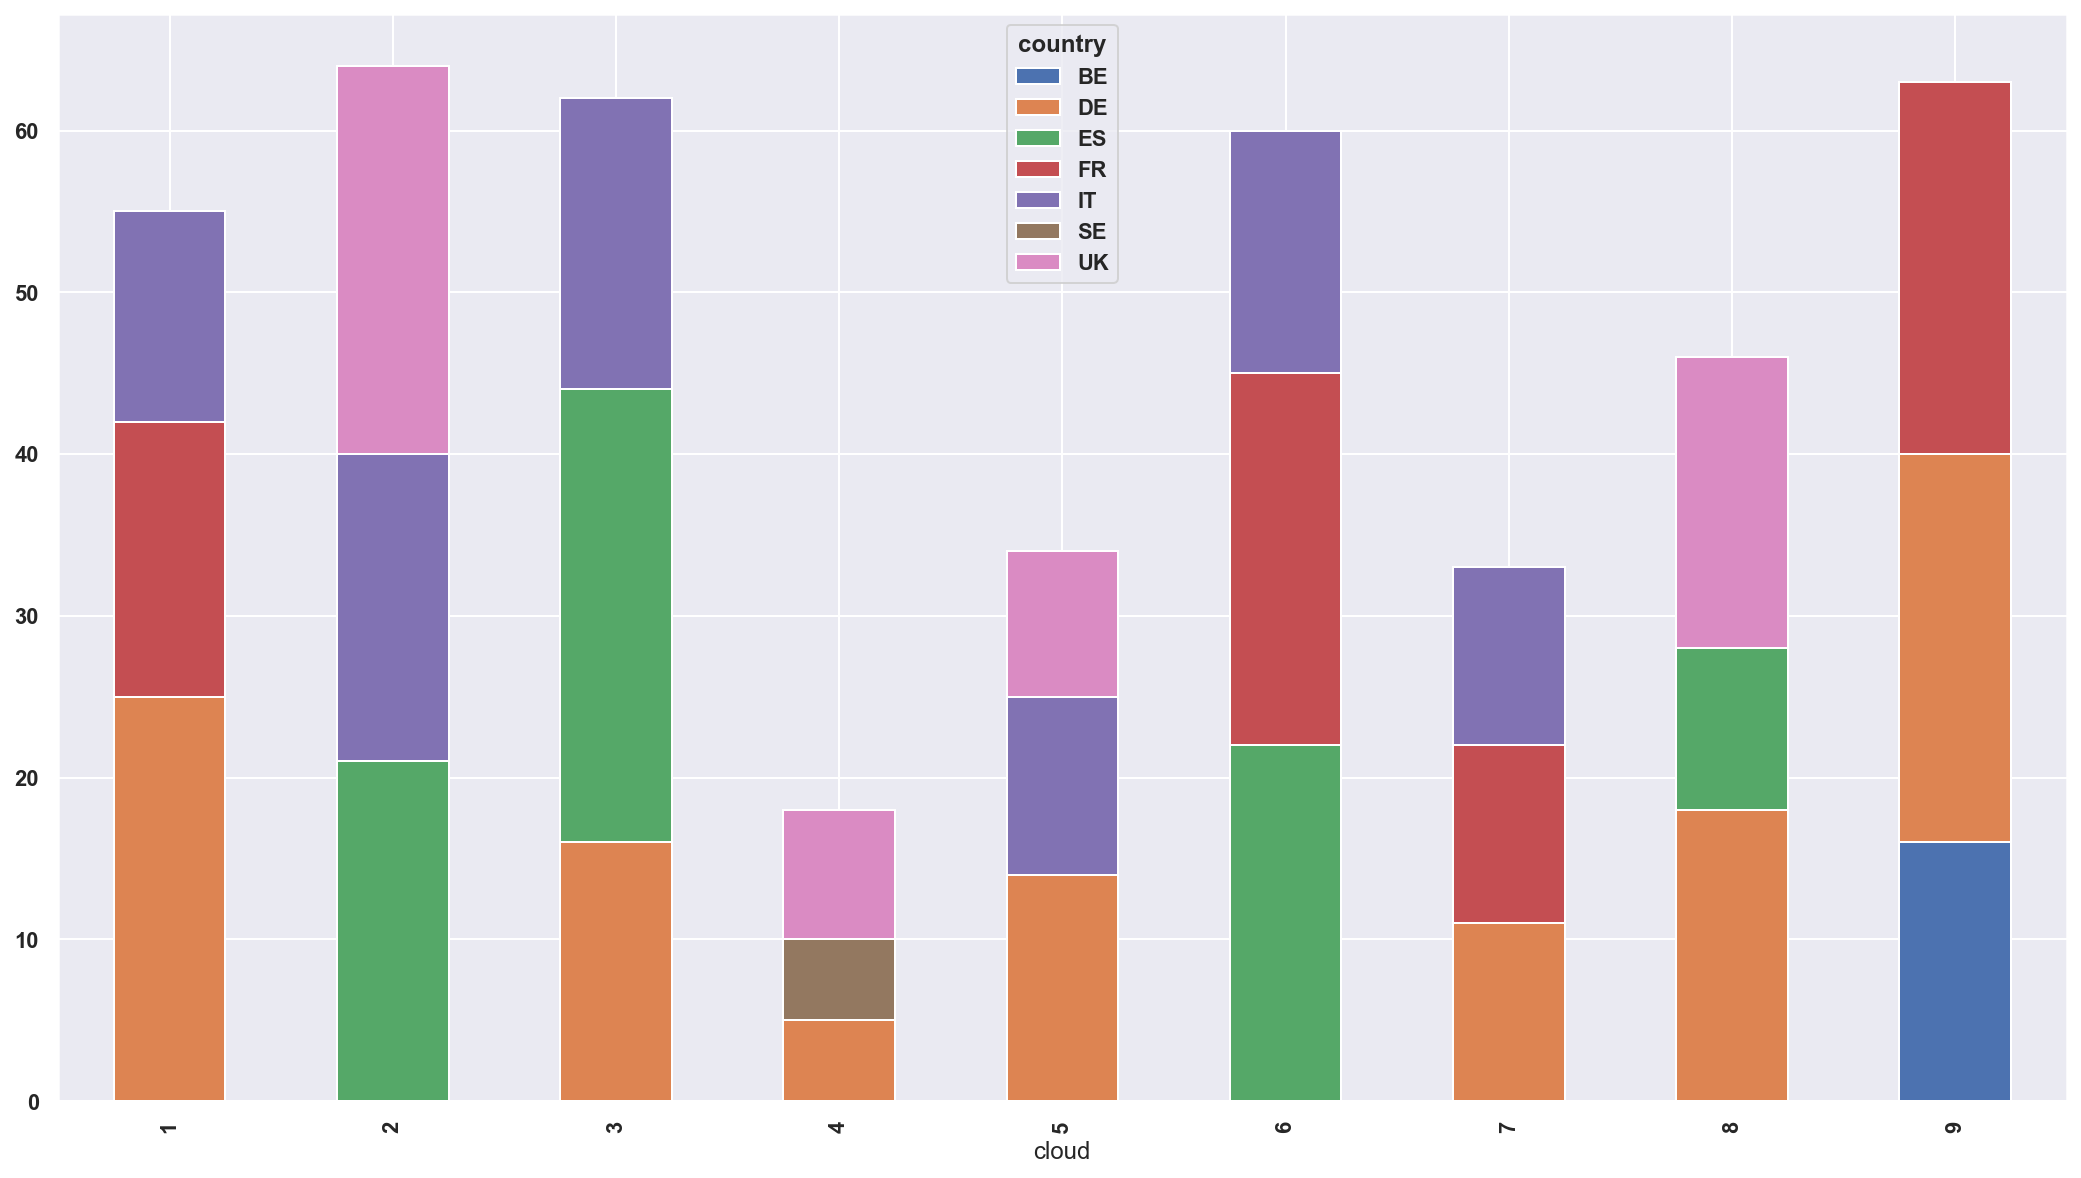

In [151]:
#temp = df_countryCloud.groupby('cloud', as_index=False)

#sort_list = df_countryCloud.groupby('country').count().sort_values('nProjects', ascending=False).index

ax = df_countryCloud.pivot(index='cloud', columns='country', values='nProjects').plot(kind='bar',\
                                                    figsize=(18,10), legend=True, stacked=True)




In [330]:
ax.figure.savefig("mr2_results/countries_by_dominant_cloud.svg")
ax.figure.savefig("mr2_results/countries_by_dominant_cloud.png")

In [262]:
#type(list(df_countryCloud.nProjects['1'])[0])

# NAPRAVI OVO U TABLEAU U PON!!

# BHL: Fitting PF and TOPICS

In [152]:
"""
The matrix below is created by BHL - we presented is as qualitative expert analysis.
It connects, using a series of weights provided upon expert analysis, layers of the PF (rows)
and topic clouds that are the result of """

bhl_matrix = np.array([[1,3,1.5,1.5,1,0,1,2,0.5],  # ROWS: layers of the PF, COLS: topic clouds
                     [1,2,1.5,0.5,1,2,0.5,1.5,0.5],
                     [0,2,0,0.5,0,2.5,1,1,0.5],
                     [1,0,0,0,0,4,0,0,0.5],
                      [0,4,1,1,1,0.5,2.5,3.5,1]])

bhl_matrix.shape

(5, 9)

In [153]:
topic_dist.shape

(926, 9)

In [154]:
# bhl_matrix - layes x clouds
# topic_dist - projects x clouds

# projects x layers
projects_layers = np.matmul(topic_dist, bhl_matrix.T)
projects_layers.shape

(926, 5)

In [155]:
df_projects_layers = pd.DataFrame(projects_layers, columns = ("1. Creating individualised...",
                                                             "2. Improving overall performance",
                                                             "3. Improving resilience...",
                                                             "4. Providing safe and efficient ATM",
                                                             "5. Intermodal transport system"))

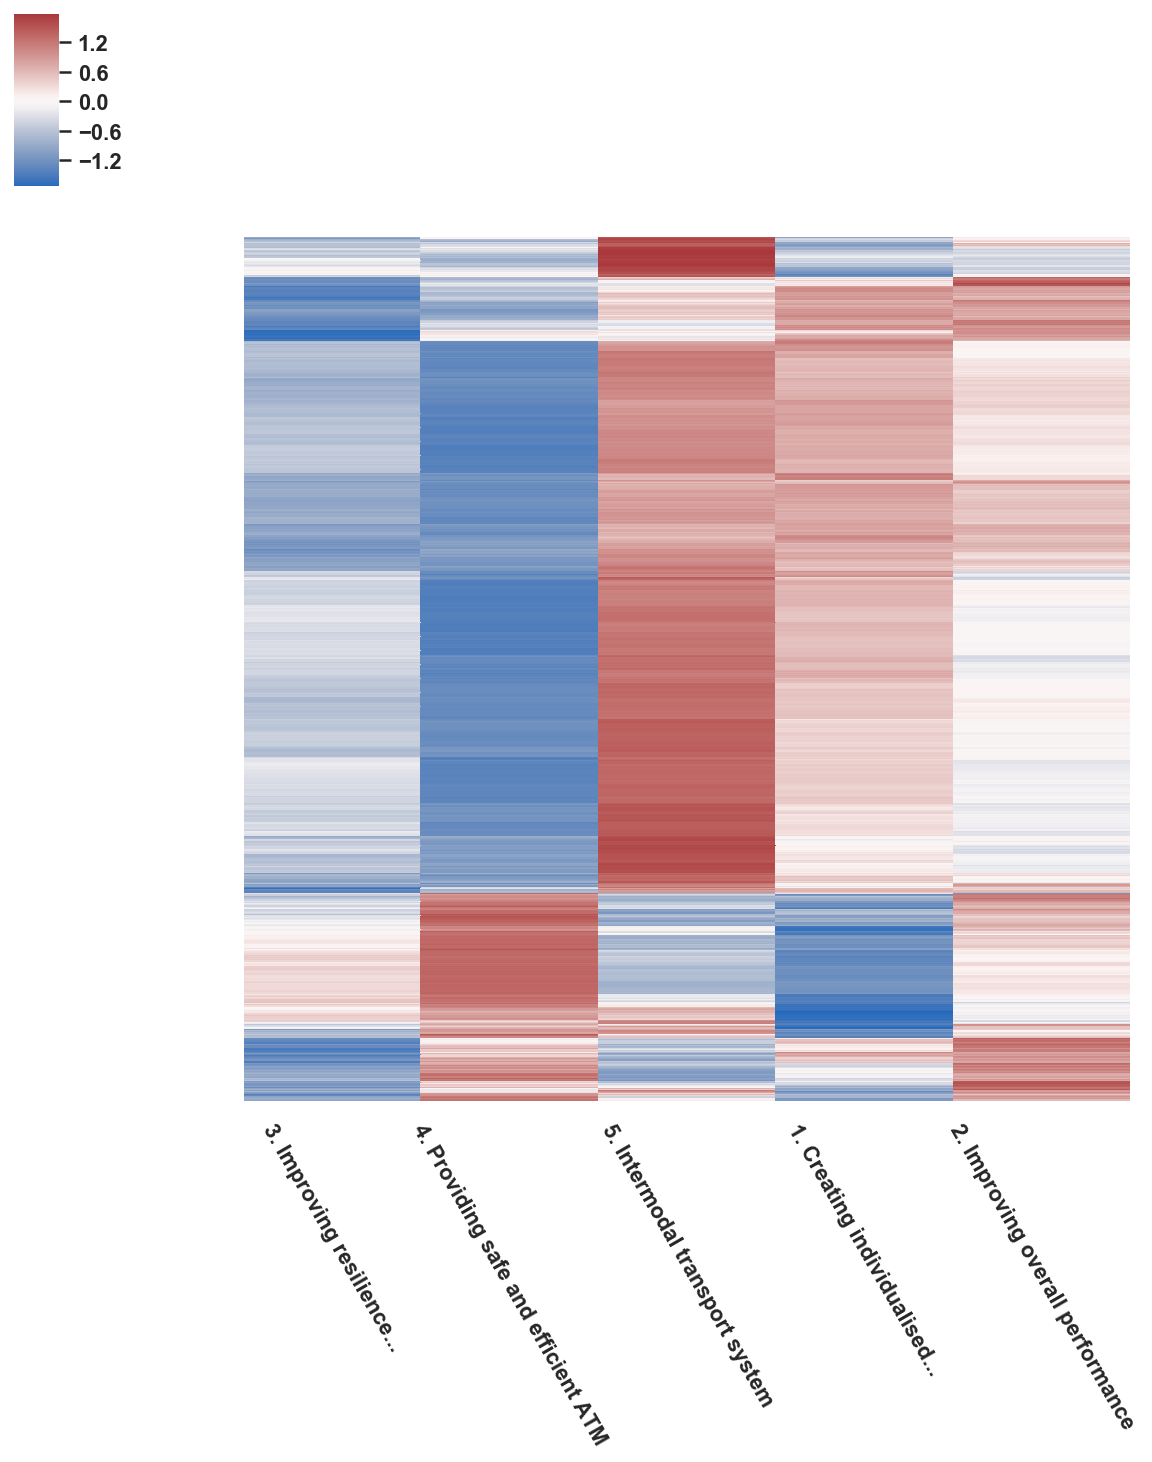

In [160]:
sns.set(color_codes = True)
g = sns.clustermap(df_projects_layers, cmap = "vlag", z_score=0, yticklabels=0)
g.ax_row_dendrogram.set_visible(False) # removes the lines of the dendogram that connects the clusters!
g.ax_col_dendrogram.set_visible(False)
plt.setp(g.ax_heatmap.xaxis.get_majorticklabels(), rotation=300)

plt.show()

In [161]:
g.savefig("mr2_results/heatmap_projects_layers.svg")
g.savefig("mr2_results/heatmap_projects_layers.png")